# How are People Dying in the United States? Visualizing Mortality

**Death** is a _morbid_ topic, but it is a topic that is important for the government, for healthcare, economics and of course, medical sciences. Understanding how people are dying can lead to changes in research funding for certain diseases, or increased preventative measures when certain kinds of people are at risk.

In United States, the **Centers of Disease Control and Prevention (CDC)** have been collecting [mortality data](https://wonder.cdc.gov/ucd-icd10.html) from 1999-2015. The data is rich in demographic info, including age of death, underlying cause of death, gender, and even race and geographic city/county.

With data, there are many **questions we can ask about death**:
- What are the top causes of death in the United States? 
- Are men more likely to die than women? Does it depend on the cause of death? Does it depend on age?
- What causes of death are becoming more or less prevalent over time?

#### Learning Data Visualization

In this notebook, you will be introduced to **Matplotlib**, one of the most popular packages for data visualization in Python.

There are many different ways to _use_ **Matplotlib**, but this notebook will simply go through the basics. If you'd like to continue learning more about **Matplotlib**, you can review the documentation [here](http://matplotlib.org/).

<a id="mpl"></a>
## Import **Matplotlib** library

To begin, let's make sure that we have the appropriate libraries for plotting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# The command allows to transfer the server part of creation of charts in the Notebook. 
# This is not important at this stage, but it is recommended use in the future
%matplotlib inline 

import sys

<a id="getdata"></a>
## Getting the Data

Now read the file `deaths.csv`:

In [2]:
df = pd.read_csv("c:/lab6/deaths.csv", encoding='GBK') # allows to use chinese symbols
df

Cause Code-ICD-10-113  Age Gender  \
0                           Salmonella infections       GR113-001    0      F   
1                           Salmonella infections       GR113-001    0      F   
2                           Salmonella infections       GR113-001    0      F   
3                           Salmonella infections       GR113-001    1      F   
4                           Salmonella infections       GR113-001    1      F   
...                                           ...             ...  ...    ...   
30901  Enterocolitis due to Clostridium difficile       GR113-136   99      M   
30902  Enterocolitis due to Clostridium difficile       GR113-136   99      M   
30903  Enterocolitis due to Clostridium difficile       GR113-136  100      M   
30904  Enterocolitis due to Clostridium difficile       GR113-136  100      M   
30905  Enterocolitis due to Clostridium difficile       GR113-136  100      M   

       Year  Deaths      Population      Crude Rate  
0      2005       0         1956682      Unreliable  
1      2010       1         1929877      Unreliable  
2      2015       3         1942904      Unreliable  
3      2005       0         1950494      Unreliable  
4      2010       0         1947217      Unreliable  
...     ...     ...             ...             ...  
30901  2010       6  Not Applicable  Not Applicable  
30902  2015       7  Not Applicable  Not Applicable  
30903  2005       8  Not Applicable  Not Applicable  
30904  2010       4  Not Applicable  Not Applicable  
30905  2015      14  Not Applicable  Not Applicable  

[30906 rows x 8 columns]

Great! The data is now read into the variable, **`df`**.

<a id="understand"></a>
## Understanding the Data

#### The top 10 rows:

In [3]:
df.head(10)

Cause Code-ICD-10-113  Age Gender  Year  Deaths Population  \
0  Salmonella infections       GR113-001    0      F  2005       0    1956682   
1  Salmonella infections       GR113-001    0      F  2010       1    1929877   
2  Salmonella infections       GR113-001    0      F  2015       3    1942904   
3  Salmonella infections       GR113-001    1      F  2005       0    1950494   
4  Salmonella infections       GR113-001    1      F  2010       0    1947217   
5  Salmonella infections       GR113-001    1      F  2015       0    1939269   
6  Salmonella infections       GR113-001    2      F  2005       0    1932337   
7  Salmonella infections       GR113-001    2      F  2010       0    2004731   
8  Salmonella infections       GR113-001    2      F  2015       0    1939979   
9  Salmonella infections       GR113-001    3      F  2005       0    1930395   

   Crude Rate  
0  Unreliable  
1  Unreliable  
2  Unreliable  
3  Unreliable  
4  Unreliable  
5  Unreliable  
6  Unreliable  
7  Unreliable  
8  Unreliable  
9  Unreliable

#### The bottom 5 rows:

In [4]:
df.tail(5)

Cause Code-ICD-10-113  Age Gender  \
30901  Enterocolitis due to Clostridium difficile       GR113-136   99      M   
30902  Enterocolitis due to Clostridium difficile       GR113-136   99      M   
30903  Enterocolitis due to Clostridium difficile       GR113-136  100      M   
30904  Enterocolitis due to Clostridium difficile       GR113-136  100      M   
30905  Enterocolitis due to Clostridium difficile       GR113-136  100      M   

       Year  Deaths      Population      Crude Rate  
30901  2010       6  Not Applicable  Not Applicable  
30902  2015       7  Not Applicable  Not Applicable  
30903  2005       8  Not Applicable  Not Applicable  
30904  2010       4  Not Applicable  Not Applicable  
30905  2015      14  Not Applicable  Not Applicable

#### What is the age range of the data?

In [5]:
df.Age.describe()

count    30906.000000
mean        50.000000
std         29.155231
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: Age, dtype: float64

#### Which years are included in this dataset?

In [6]:
## write your code here
years = list(df["Age"].unique())
years


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

 To confirm, does the Gender column only contain male and female?

In [7]:
## write your code here
gender = list(df["Gender"].unique())
gender



['F', 'M']

 What is the summary statistics for the number of deaths?

In [8]:
## write your code here
df.pivot_table(values="Deaths", index="Cause", columns="Year", aggfunc="sum", margins=False, dropna=True, fill_value=None)


Year                                                  2005    2010    2015
Cause                                                                     
Accidents (unintentional injuries)                  117752  120843  146553
Acute bronchitis and bronchiolitis                     283     177     273
Acute poliomyelitis                                      0       0       0
Alzheimer's disease                                  71598   83494  110561
Anemias                                               4624    4851    5250
Aortic aneurysm and dissection                       13843   10431    9988
Arthropod-borne viral encephalitis                       6       9       3
Assault (homicide)                                   18103   16242   17789
Atherosclerosis                                      11841    7230    6088
Cerebrovascular diseases                            143575  129474  140315
Certain conditions originating in the perinatal...   14546   12127   11715
Cholelithiasis and other disorders of gallbladder     3072    3331    3766
Chronic liver disease and cirrhosis                  27527   31902   40323
Chronic lower respiratory diseases                  130929  138076  155037
Complications of medical and surgical care            2653    2490    2686
Congenital malformations, deformations and chro...   10409    9673   10016
Diabetes mellitus                                    75119   69071   79531
Diseases of appendix                                   439     415     370
Diseases of heart                                   652054  597661  633813
Enterocolitis due to Clostridium difficile            5332    7298    7409
Essential hypertension and hypertensive renal d...   24902   26634   32200
HIV disease                                          12542    8369    6465
Hernia                                                1639    1832    2109
Hyperplasia of prostate                                525     489     571
In situ neoplasms, benign neoplasms and neoplas...   13710   14917   16277
Infections of kidney                                   767     608     715
Inflammatory diseases of female pelvic organs          120     137     125
Influenza and pneumonia                              62999   50095   57059
Intentional self-harm (suicide)                      32629   38357   44189
Legal intervention                                     414     412     530
Malaria                                                  6      10       8
Malignant neoplasms                                 559303  574738  595919
Measles                                                  1       2       0
Meningitis                                             668     608     555
Meningococcal infection                                123      79      40
Nephritis, nephrotic syndrome and nephrosis          43901   50475   49957
Nutritional deficiencies                              3183    2948    5222
Operations of war and their sequelae                    27       9       6
Parkinson's disease                                  19544   22032   27972
Peptic ulcer                                          3478    2976    3056
Pneumoconioses and chemical effects                   1006     845     728
Pneumonitis due to solids and liquids                17279   17011   19803
Pregnancy, childbirth and the puerperium               760     825    1139
Salmonella infections                                   30      28      53
Scarlet fever and erysipelas                             3       3       2
Septicemia                                           34133   34811   40769
Shigellosis and amebiasis                               10       3       4
Syphilis                                                47      28      45
Tuberculosis                                           648     568     470
Viral hepatitis                                       5529    7564    7461
Whooping cough                                          31      26       7

#### What are the causes of death in this dataset?

In [9]:
causes = pd.DataFrame(df['Cause'].unique(), columns=['Death Cause']) # remove duplicates
causes = causes.sort_values(by='Death Cause')
causes.index = range(0, len(causes)) # re-index the row numbers
causes

Death Cause
0                  Accidents (unintentional injuries)
1                  Acute bronchitis and bronchiolitis
2                                 Acute poliomyelitis
3                                 Alzheimer's disease
4                                             Anemias
5                      Aortic aneurysm and dissection
6                  Arthropod-borne viral encephalitis
7                                  Assault (homicide)
8                                     Atherosclerosis
9                            Cerebrovascular diseases
10  Certain conditions originating in the perinata...
11  Cholelithiasis and other disorders of gallbladder
12                Chronic liver disease and cirrhosis
13                 Chronic lower respiratory diseases
14         Complications of medical and surgical care
15  Congenital malformations, deformations and chr...
16                                  Diabetes mellitus
17                               Diseases of appendix
18                                  Diseases of heart
19         Enterocolitis due to Clostridium difficile
20  Essential hypertension and hypertensive renal ...
21                                        HIV disease
22                                             Hernia
23                            Hyperplasia of prostate
24  In situ neoplasms, benign neoplasms and neopla...
25                               Infections of kidney
26      Inflammatory diseases of female pelvic organs
27                            Influenza and pneumonia
28                    Intentional self-harm (suicide)
29                                 Legal intervention
30                                            Malaria
31                                Malignant neoplasms
32                                            Measles
33                                         Meningitis
34                            Meningococcal infection
35        Nephritis, nephrotic syndrome and nephrosis
36                           Nutritional deficiencies
37               Operations of war and their sequelae
38                                Parkinson's disease
39                                       Peptic ulcer
40                Pneumoconioses and chemical effects
41              Pneumonitis due to solids and liquids
42           Pregnancy, childbirth and the puerperium
43                              Salmonella infections
44                       Scarlet fever and erysipelas
45                                         Septicemia
46                          Shigellosis and amebiasis
47                                           Syphilis
48                                       Tuberculosis
49                                    Viral hepatitis
50                                     Whooping cough

<a id="year"></a>
## Deaths: by Year

#### Let's look at the data again:

In [10]:
df.head(3)

Cause Code-ICD-10-113  Age Gender  Year  Deaths Population  \
0  Salmonella infections       GR113-001    0      F  2005       0    1956682   
1  Salmonella infections       GR113-001    0      F  2010       1    1929877   
2  Salmonella infections       GR113-001    0      F  2015       3    1942904   

   Crude Rate  
0  Unreliable  
1  Unreliable  
2  Unreliable

#### How many deaths are there overall in 2005, 2010 and 2015?

First, we want to **group the data by year**, then by specifying the **Deaths** column, we can calculate the **sum of deaths per year**:

In [11]:
by_year = df.groupby("Year").Deaths.sum()
by_year

Year
2005    2143662
2010    2102234
2015    2294942
Name: Deaths, dtype: int64

After you groupby, plotting is easy. With **`.plot()`**, you just need to choose the kind of graph:

<AxesSubplot: xlabel='Year'>

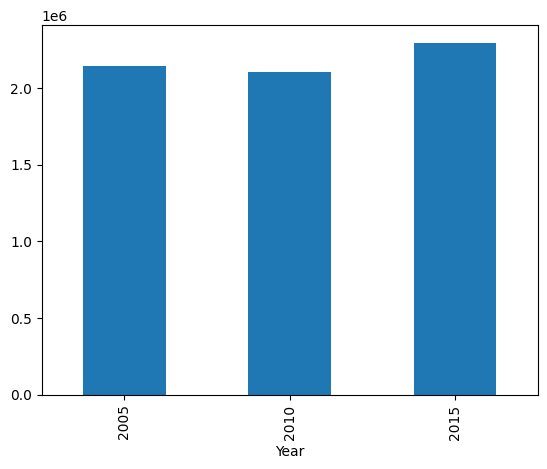

In [12]:
by_year.plot(kind="bar")

#### We can re-write the code for the same plot so it's easier to follow:

<AxesSubplot: xlabel='Year'>

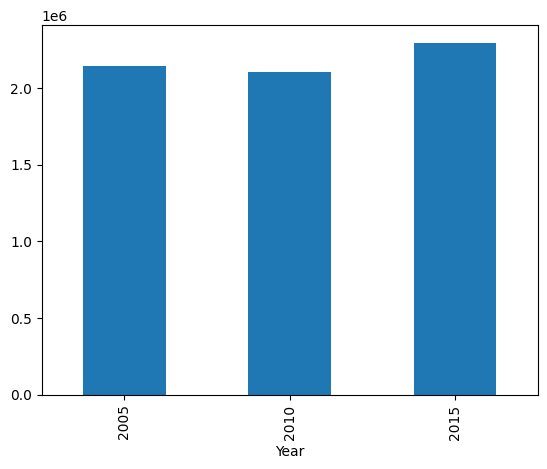

In [13]:
# Making syntax easier to read. \ tells Python to continue to the next line before executing 
df.groupby("Year")\
.Deaths\
.sum()\
.plot(kind="bar")

## Split data into years

It's going to get confusing if we always have data from 2005, 2010 and 2015.
  
Let's just start by exploring only the **deaths in 2015**.

<a id="gender"></a>
## Deaths: Male vs. Female

In 2015, which gender had a higher mortality rate?

In [14]:
df2015 = df[df.Year == 2015]

df2015\
.groupby("Gender")\
.Deaths\
.sum()

Gender
F    1103789
M    1191153
Name: Deaths, dtype: int64

#### Can you create a simple bar graph to compare the total number of deaths for each gender?

<AxesSubplot: xlabel='Gender'>

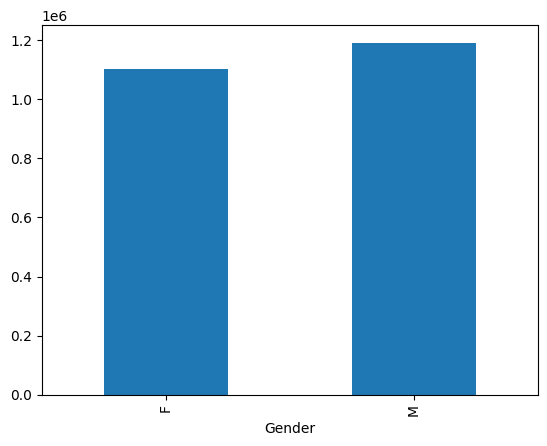

In [15]:
## write your code here
df2015 = df[df.Year == 2015]

df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind="bar")

Let's add **color** to the graph: <font color=red>red</font> for **Female** and  <font color=blue>blue</font> for **Male**.

We can add color using:
> `.plot(kind="bar", ` **`color=["red", "blue"]`**`)`

<AxesSubplot: xlabel='Gender'>

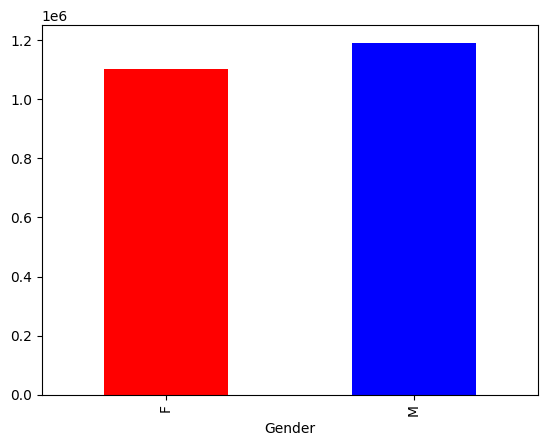

In [16]:
df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind="bar", color=["red", "blue"])
# try both options. How it works?
# .plot(kind="bar", color=["green", "red", "blue"]) 

<a id="age"></a>
## Deaths: by Age

At what age did people die in 2015?

<AxesSubplot: xlabel='Age'>

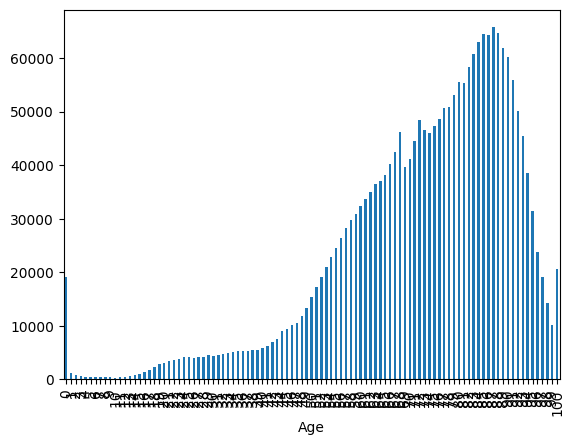

In [18]:
## write your code here
df2015 = df[df.Year == 2015]

df2015\
.groupby("Age")\
.Deaths\
.sum()\
.plot(kind="bar")

The graph above is difficult to read -- it's **too small**! 

We can increase the figure size using: 
> `.plot(kind="bar",`** figsize=[18, 6]**`)`

<AxesSubplot: xlabel='Age'>

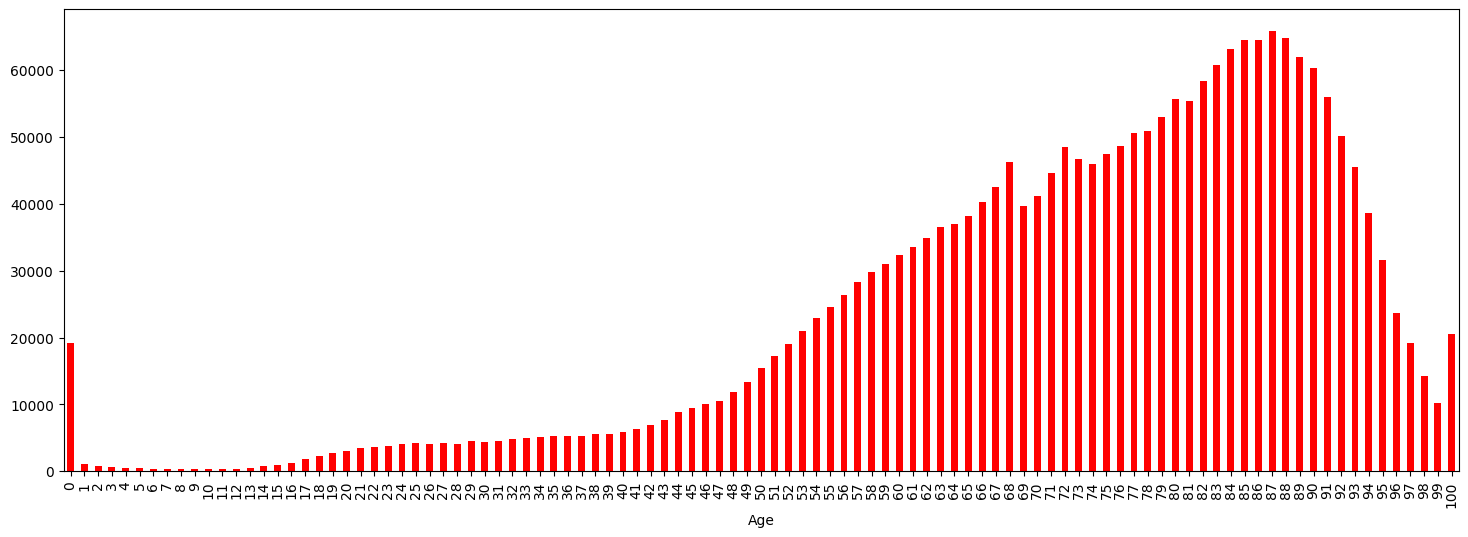

In [19]:
## write your code here
df2015 = df[df.Year == 2015]

df2015\
.groupby("Age")\
.Deaths\
.sum()\
.plot(kind="bar", color="red", figsize=[18,6])

# play with other options. Understand how it works
# .plot(kind="bar", color="grey", figsize=[9, 6])
# .plot(kind="bar", color="grey", figsize=[150, 6])

<font color="green"> What do you notice from the graph above? </font>

Conclusions:

1.I noticed that a lot of babies(0 years old) died, and then up to 87 age, amount of deaths is increasing  

<a id="ageXgender"></a>
## Deaths: by Age & Gender

#### Is age of death affected by gender?

To groupby the data using two variables, simply use a list:
> `.groupby(`**`["Age", "Gender"]`**`)`

In [20]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()

Age  Gender
0    F          8634
     M         10512
1    F           470
     M           645
2    F           335
               ...  
98   M          3669
99   F          7685
     M          2506
100  F         16615
     M          3985
Name: Deaths, Length: 202, dtype: int64

#### Let's create two subplots -- one for female and male deaths by age.

We can create subplots using: 
> ...  
> **`.unstack(1)`**`\`  
> `.plot(kind="bar", ` **` subplots=True`**`)`

array([<AxesSubplot: title={'center': 'F'}, xlabel='Age'>,
       <AxesSubplot: title={'center': 'M'}, xlabel='Age'>], dtype=object)

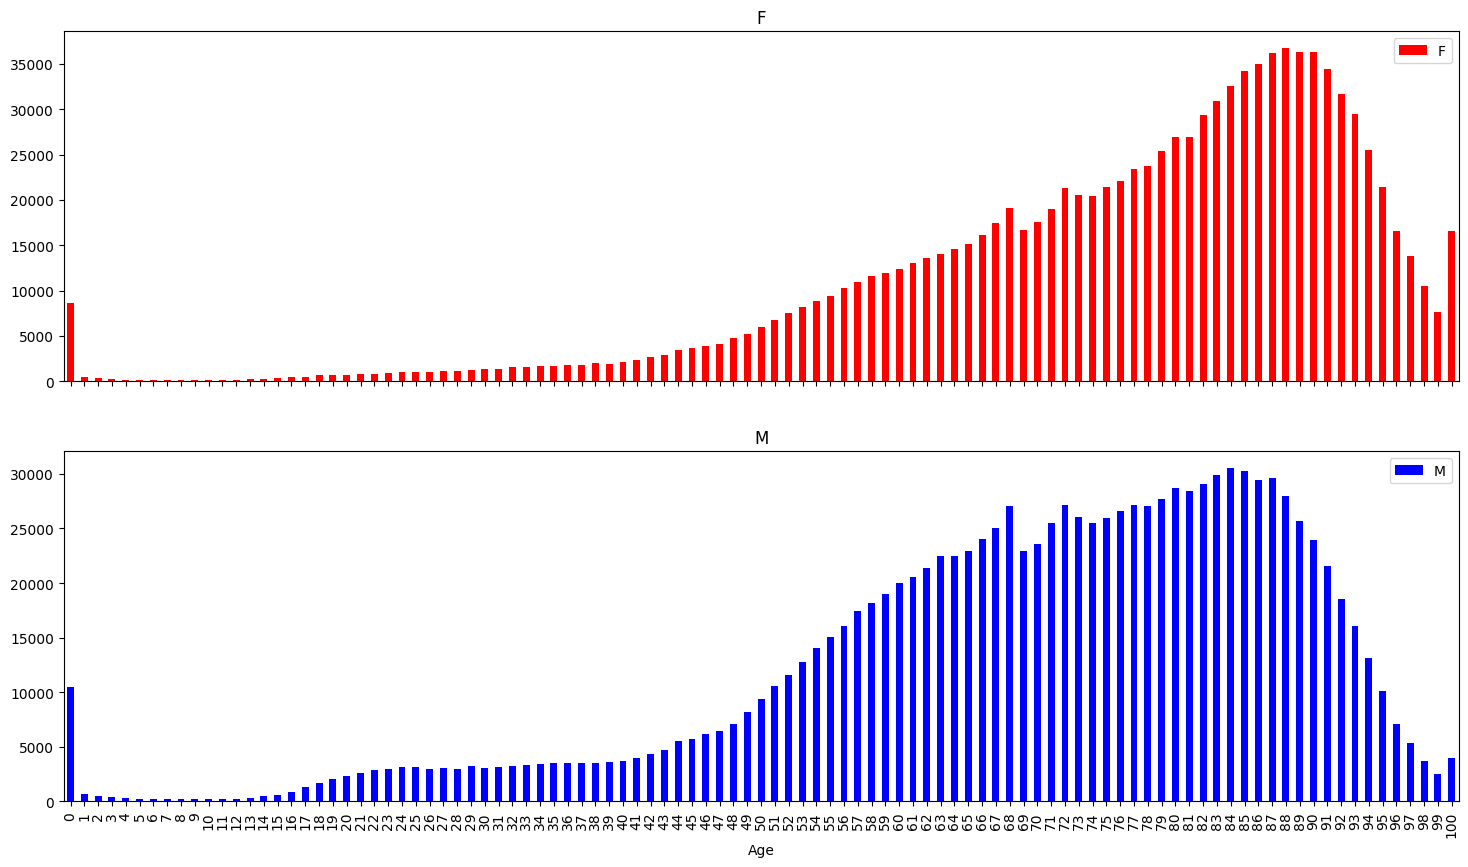

In [21]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="bar", color=["red", "blue"], figsize=[18, 10], subplots=True)

<font color="green"> What do you notice from the graph above? </font>

Conclusions:

1.That Many men begin to die at a younger age compared to women

We can also **stack** the Male and Female together to form a total bar.

To create stacked bar charts, we can use:
>`.plot(kind="bar", ` **`stacked=True`**`)`

<AxesSubplot: xlabel='Age'>

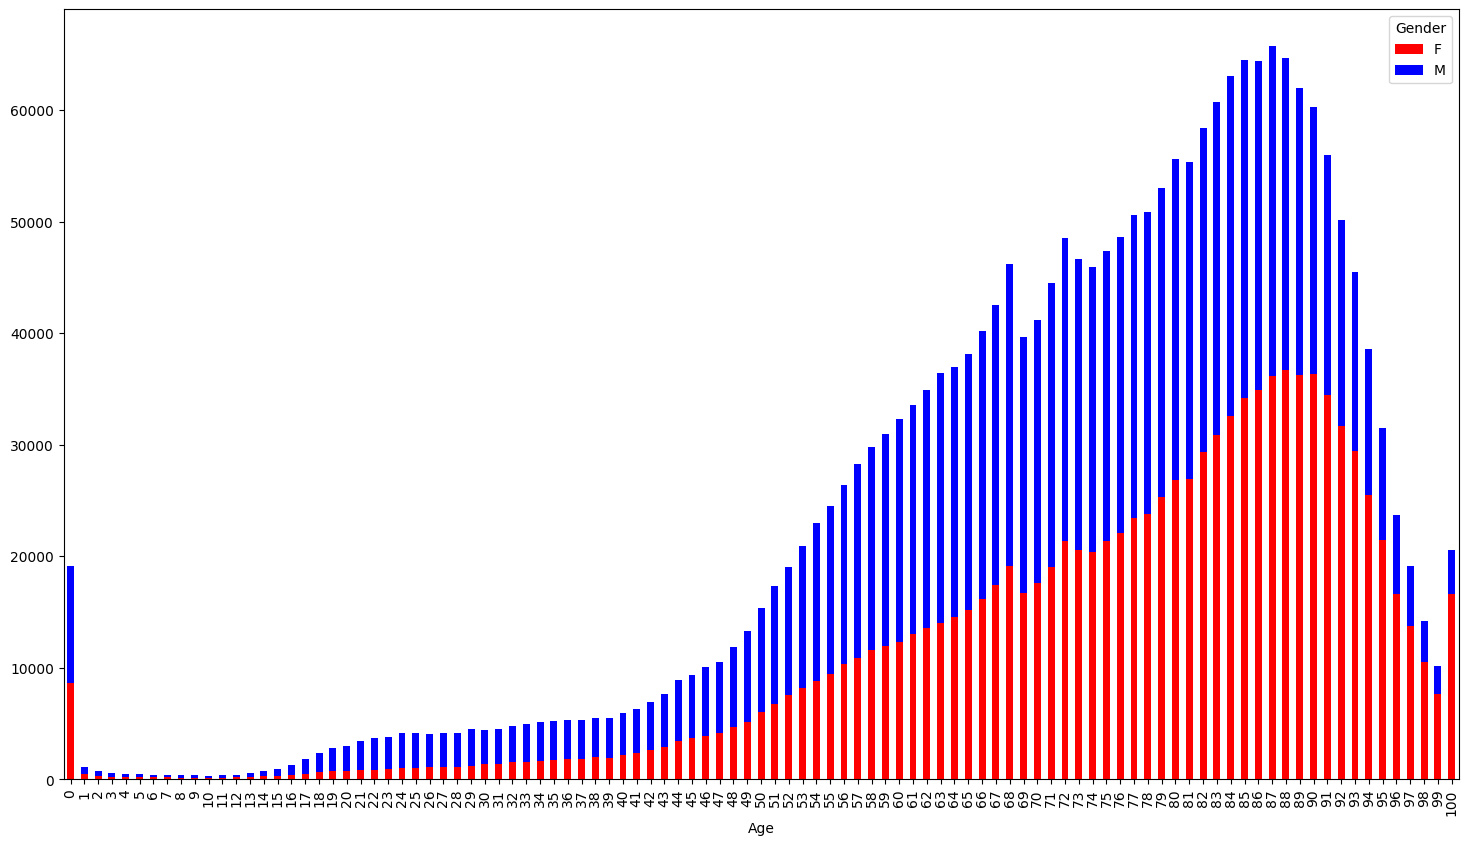

In [22]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="bar", color=["red", "blue"], figsize=[18, 10], stacked=True)

But this isn't very helpful because it is not easy to compare M to F in a stacked bar chart.

<font color="green"> Give examples, when stacked bar chart will be useful</font>

Examples (2):

1. When we want to see what part is taken by some element in the big picture: company's profit, company's losses

#### Because `Age` is a continuous variable, it might help to compare lines on a **line graph**. 

We can create line graphs using:
> `.plot(kind="`**`line`**`")`

array([<AxesSubplot: xlabel='Age'>, <AxesSubplot: xlabel='Age'>],
      dtype=object)

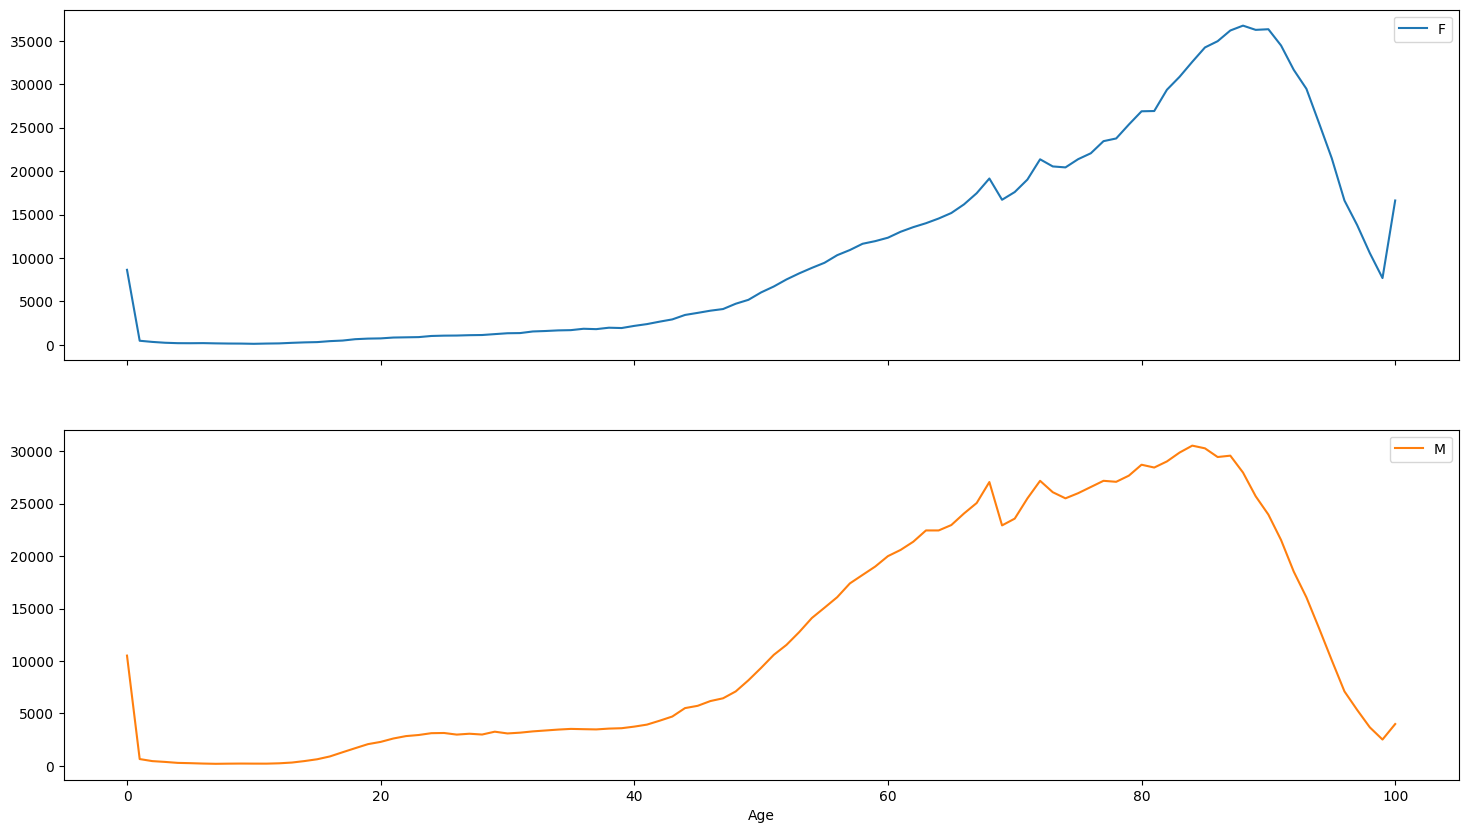

In [23]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="line", figsize=[18, 10], subplots=True)

Now with just lines, this makes it easier to compare the gender difference over age in **one line graph**.

To plot multiple groups in the same graph, make sure that you have **unstacked the data** and **kept subplots as False (default)** :
>`...`  
>**`.unstack(1)`**`\`  
>`.plot(kind="line")   #Default: subplots = False`

<AxesSubplot: xlabel='Age'>

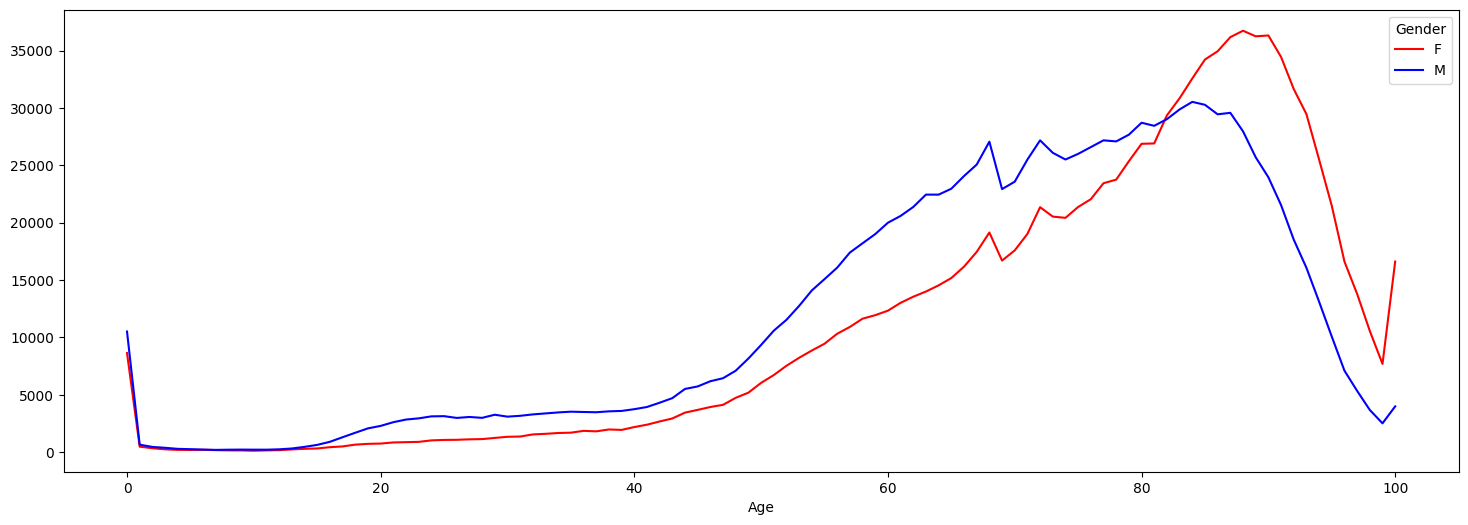

In [24]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="line", color=["red", "blue"], figsize=[18,6])

Let's add a main title and a y-axis label:

> `.plot(kind = "line",` **`title = "Deaths in 2015 by Age and Gender"`**`)`


<AxesSubplot: title={'center': 'Deaths in 2015 by Age and Gender'}, xlabel='Age'>

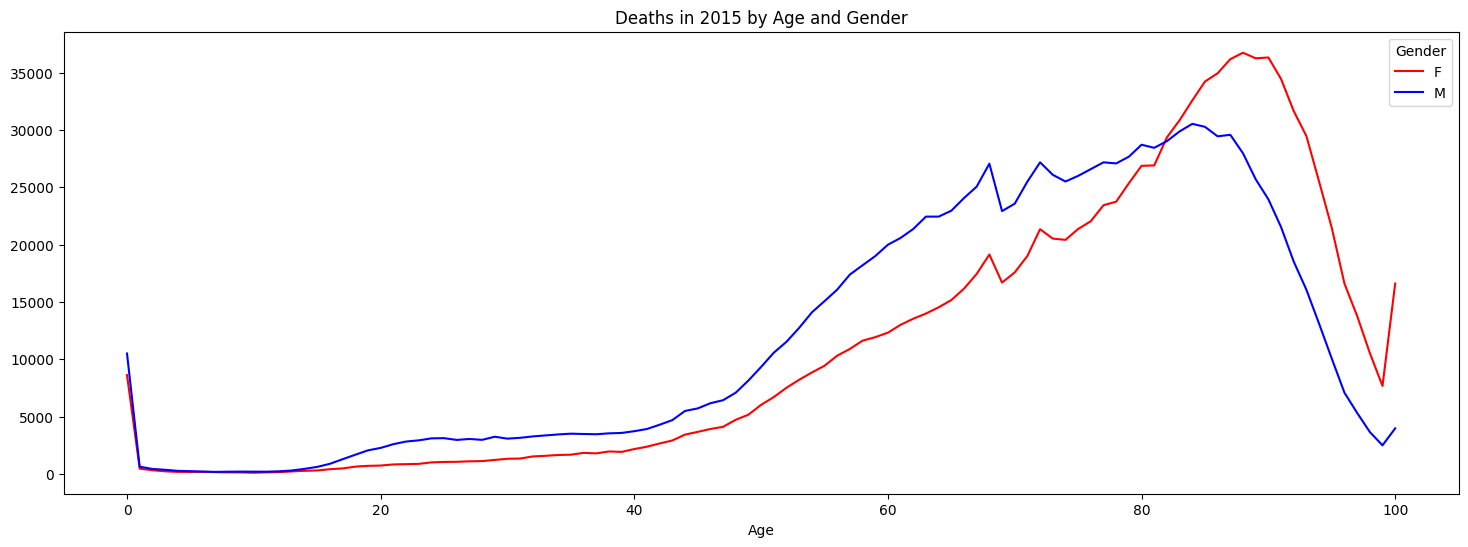

In [25]:
## write your code here
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="line", color=["red", "blue"], figsize=[18,6], title="Deaths in 2015 by Age and Gender")

<a id="causeX2015"></a>
## Deaths: Top Causes of Death in 2015

Let's look at the top causes of death in 2015:

<AxesSubplot: xlabel='Cause'>

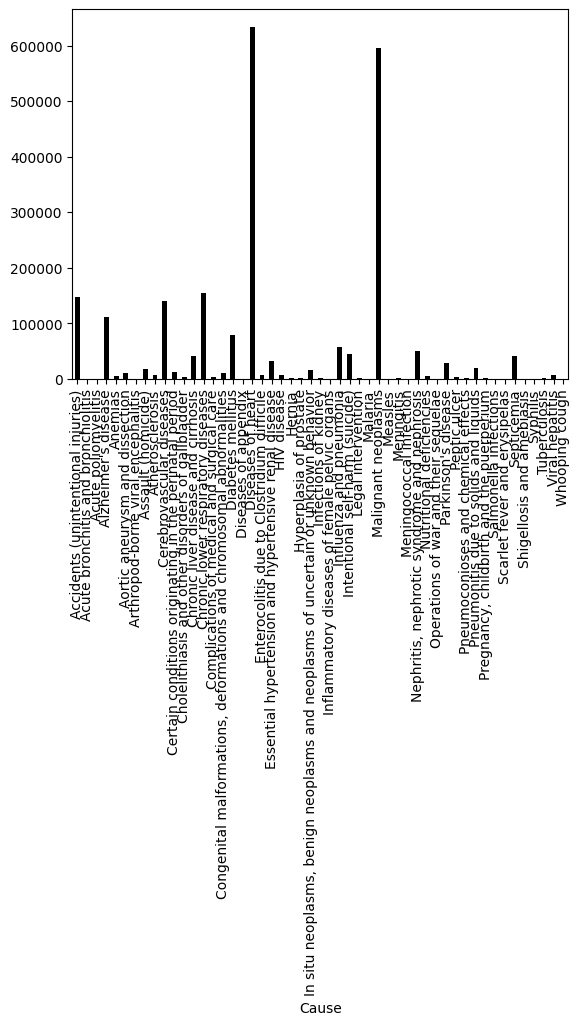

In [26]:
df2015\
.groupby(["Cause"])\
.Deaths\
.sum()\
.plot(kind="bar", color="black")

This is very difficult to read. We need to **sort the data** and **rotate the graph (horizontal bar chart)**.

1. We can **sort** the data using:
> **`.sort('Deaths', ascending=True)`**

2. We can create a **horizontal bar chart** using:
> **`.plot(kind="barh")`**

<AxesSubplot: ylabel='Cause'>

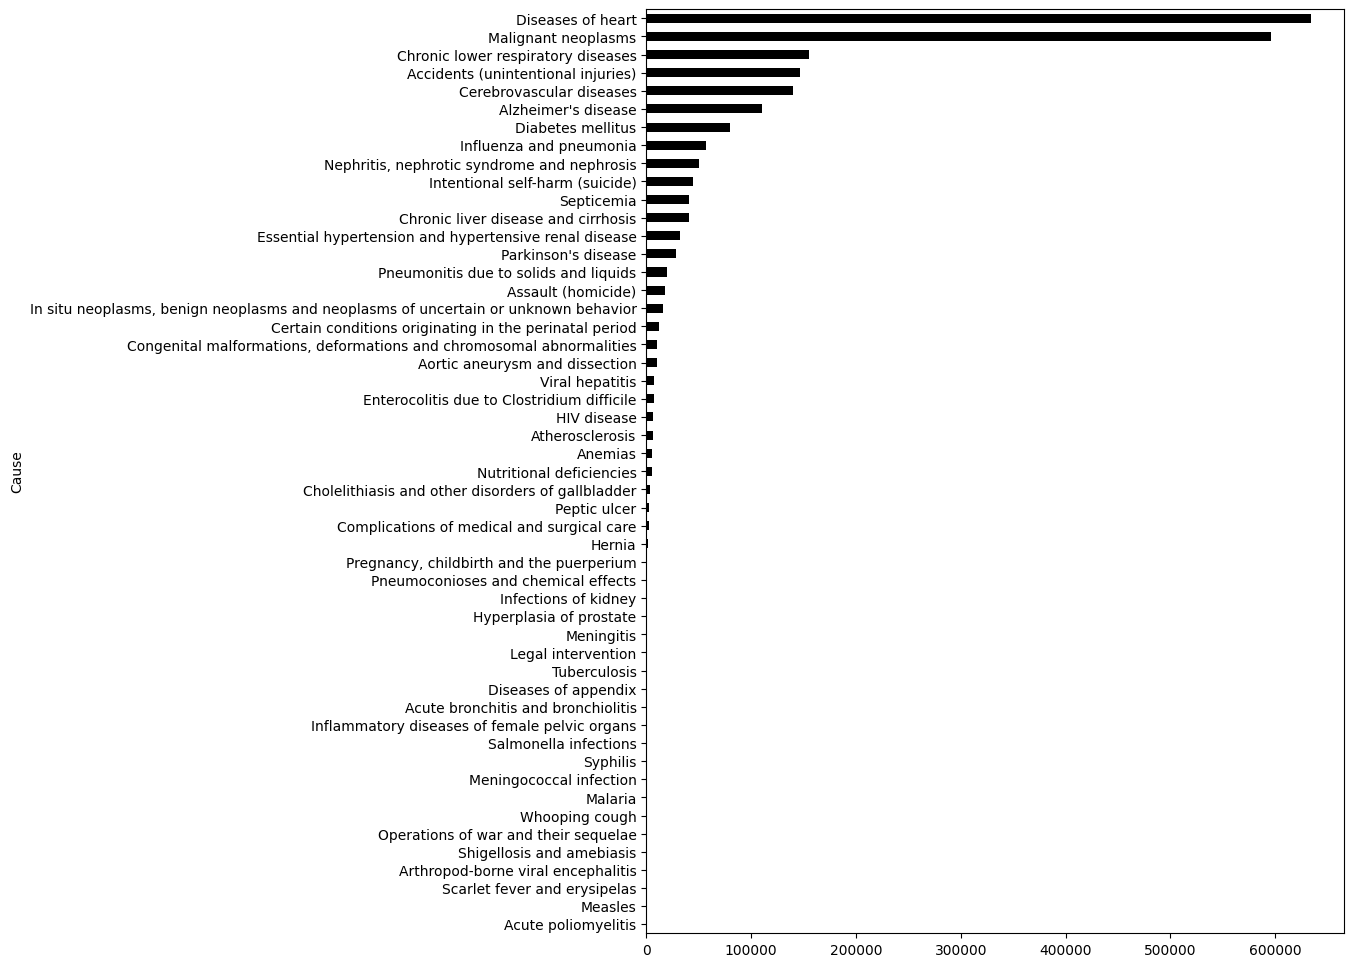

In [27]:
df2015\
.groupby(["Cause"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths', ascending=True)\
.plot(kind="barh", legend=False, color="black", figsize=[9, 12])

#### Let's look at the Top 10 most common causes of death. 

<AxesSubplot: ylabel='Cause'>

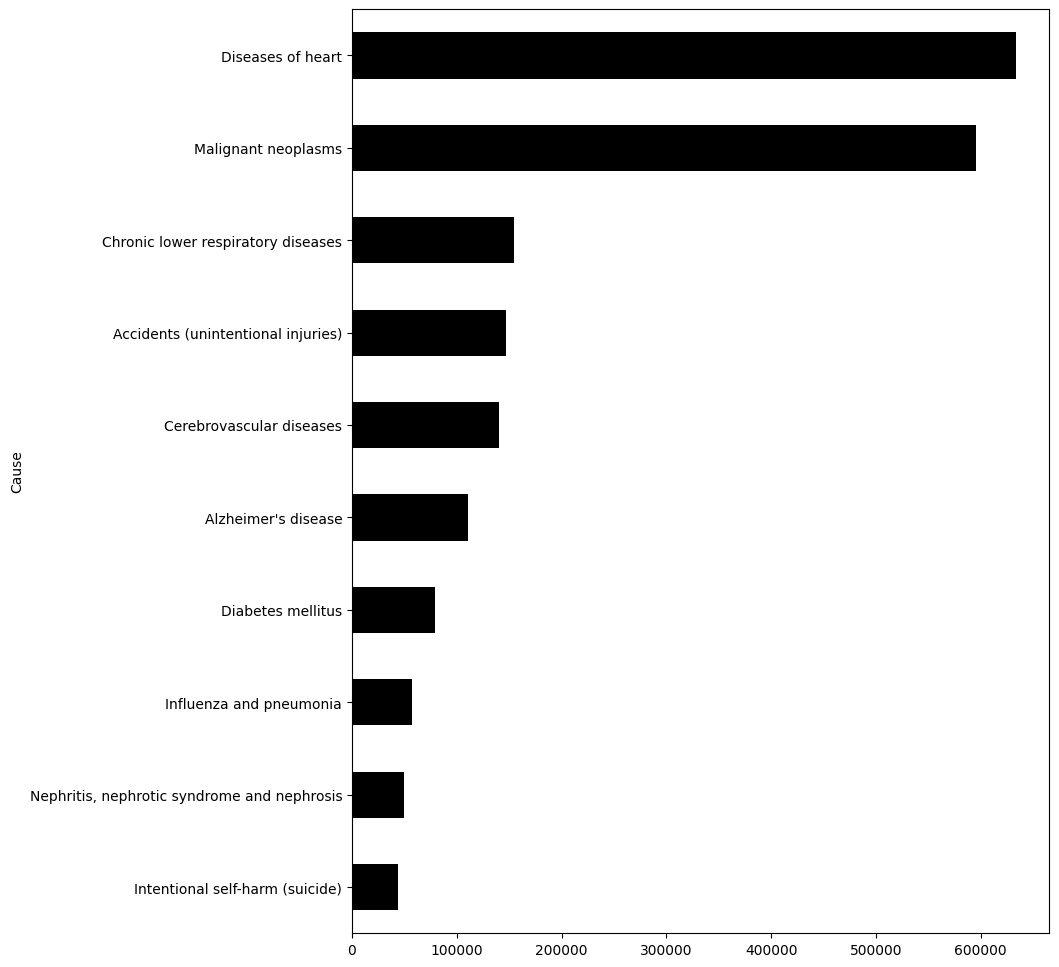

In [28]:
## write your code here
df2015\
.groupby(["Cause"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths', ascending=True)\
.tail(10)\
.plot(kind="barh", legend=False, color="black", figsize=[9, 12])

<a id="causeXyear"></a>
## Deaths: Top Causes of Death by Year

<AxesSubplot: ylabel='Cause'>

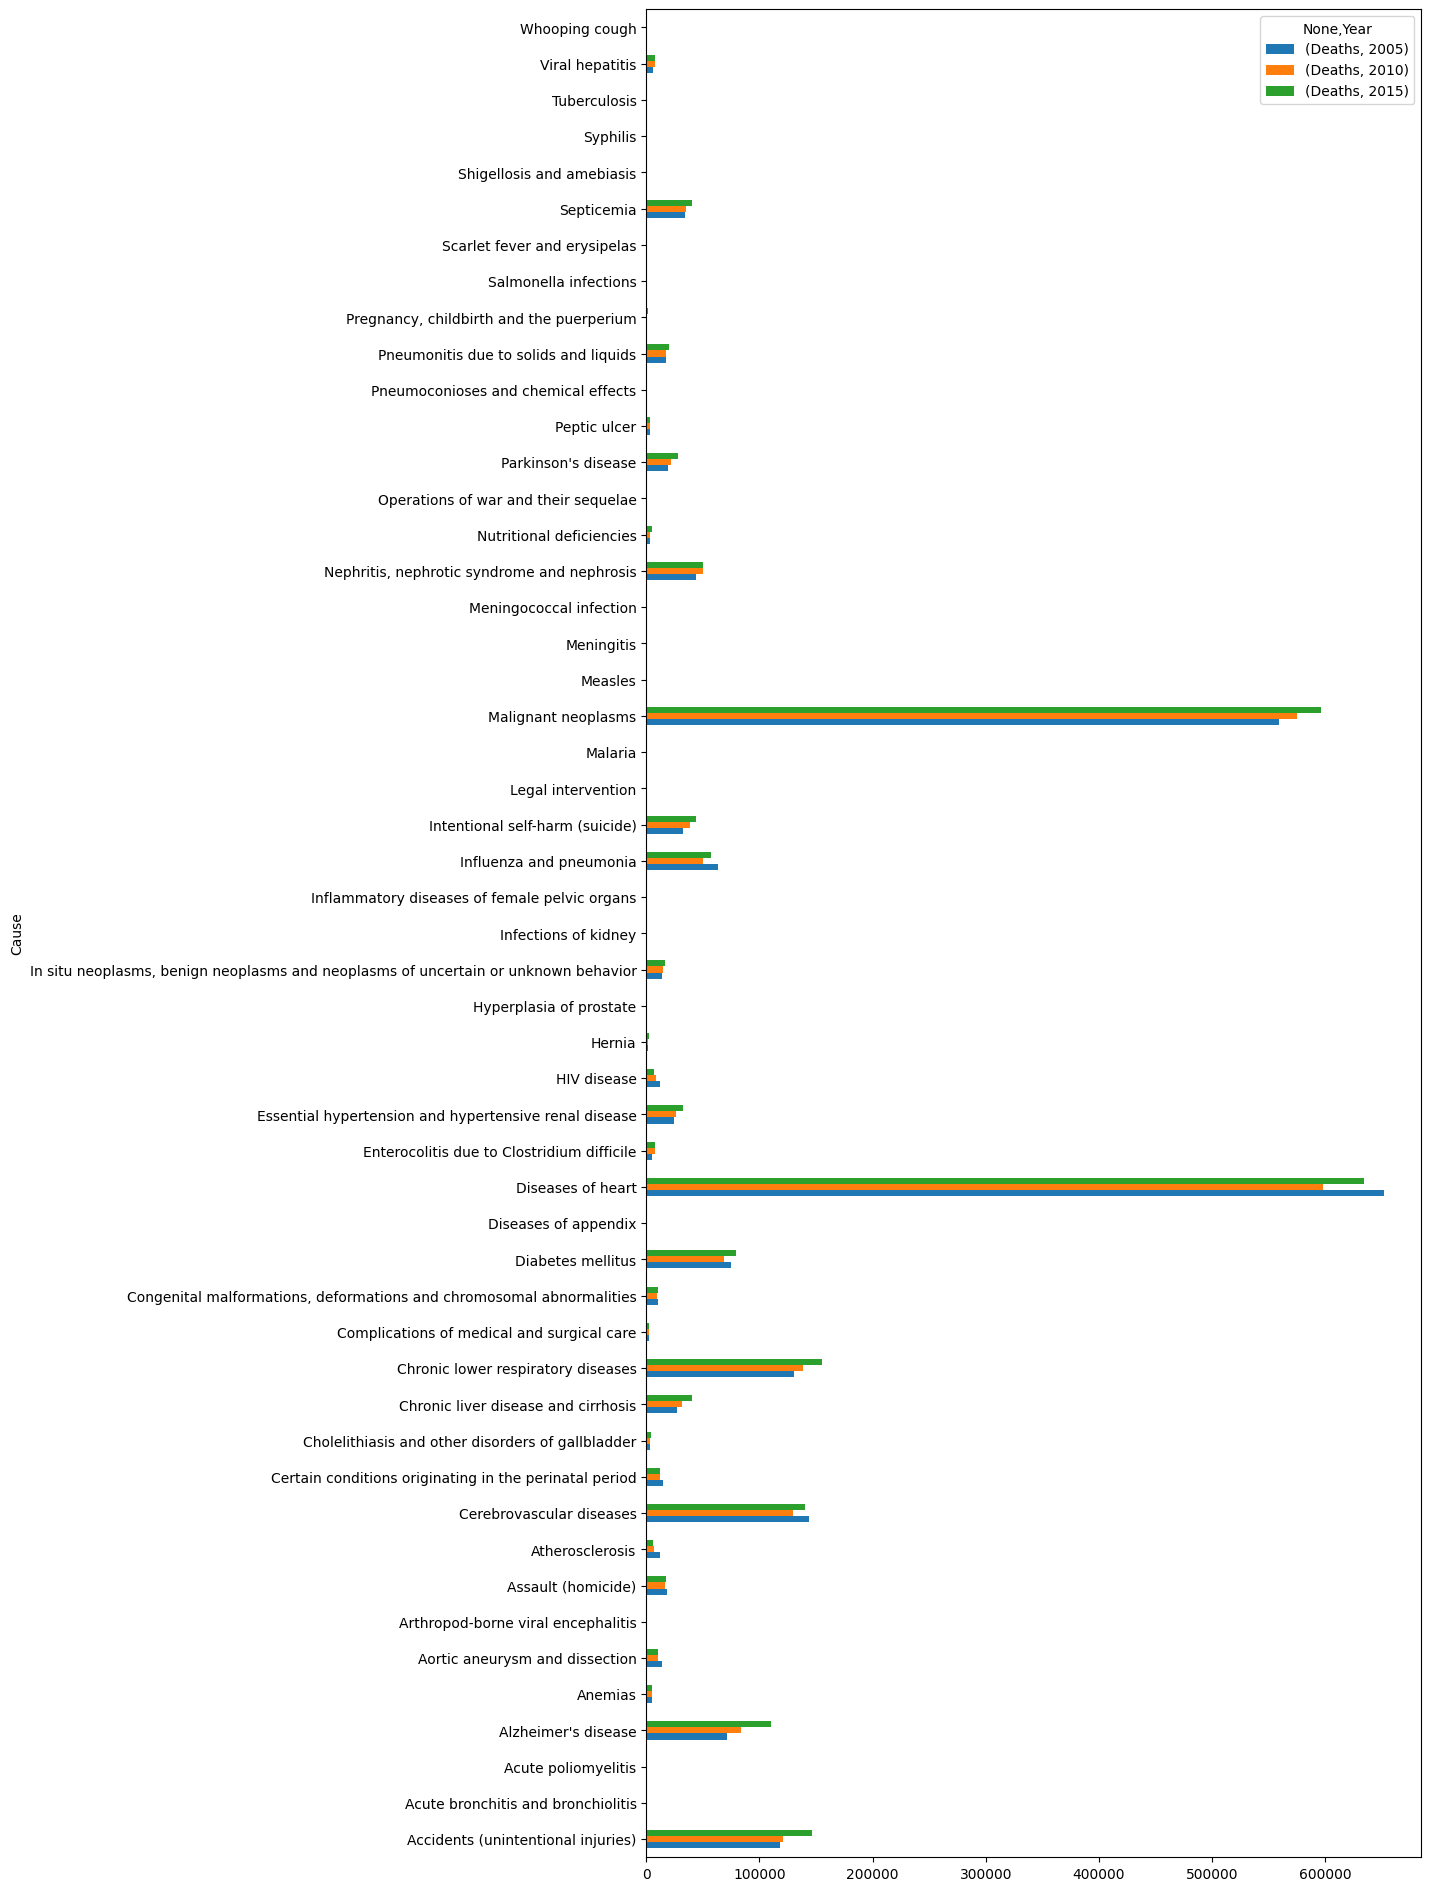

In [29]:
df\
.groupby(["Cause","Year"])\
.agg({'Deaths':sum})\
.sort_values('Deaths', ascending = False)\
.unstack(1)\
.plot(kind="barh", legend=True, figsize=[10, 24])

The visualization above contains a lot of information (maybe too much!). But did you notice? 

**Deaths caused by HIV disease has decreased every five years since 2005!**

<a id="causeXgender"></a>
## Deaths: Causes of Death by Gender

<AxesSubplot: ylabel='Cause'>

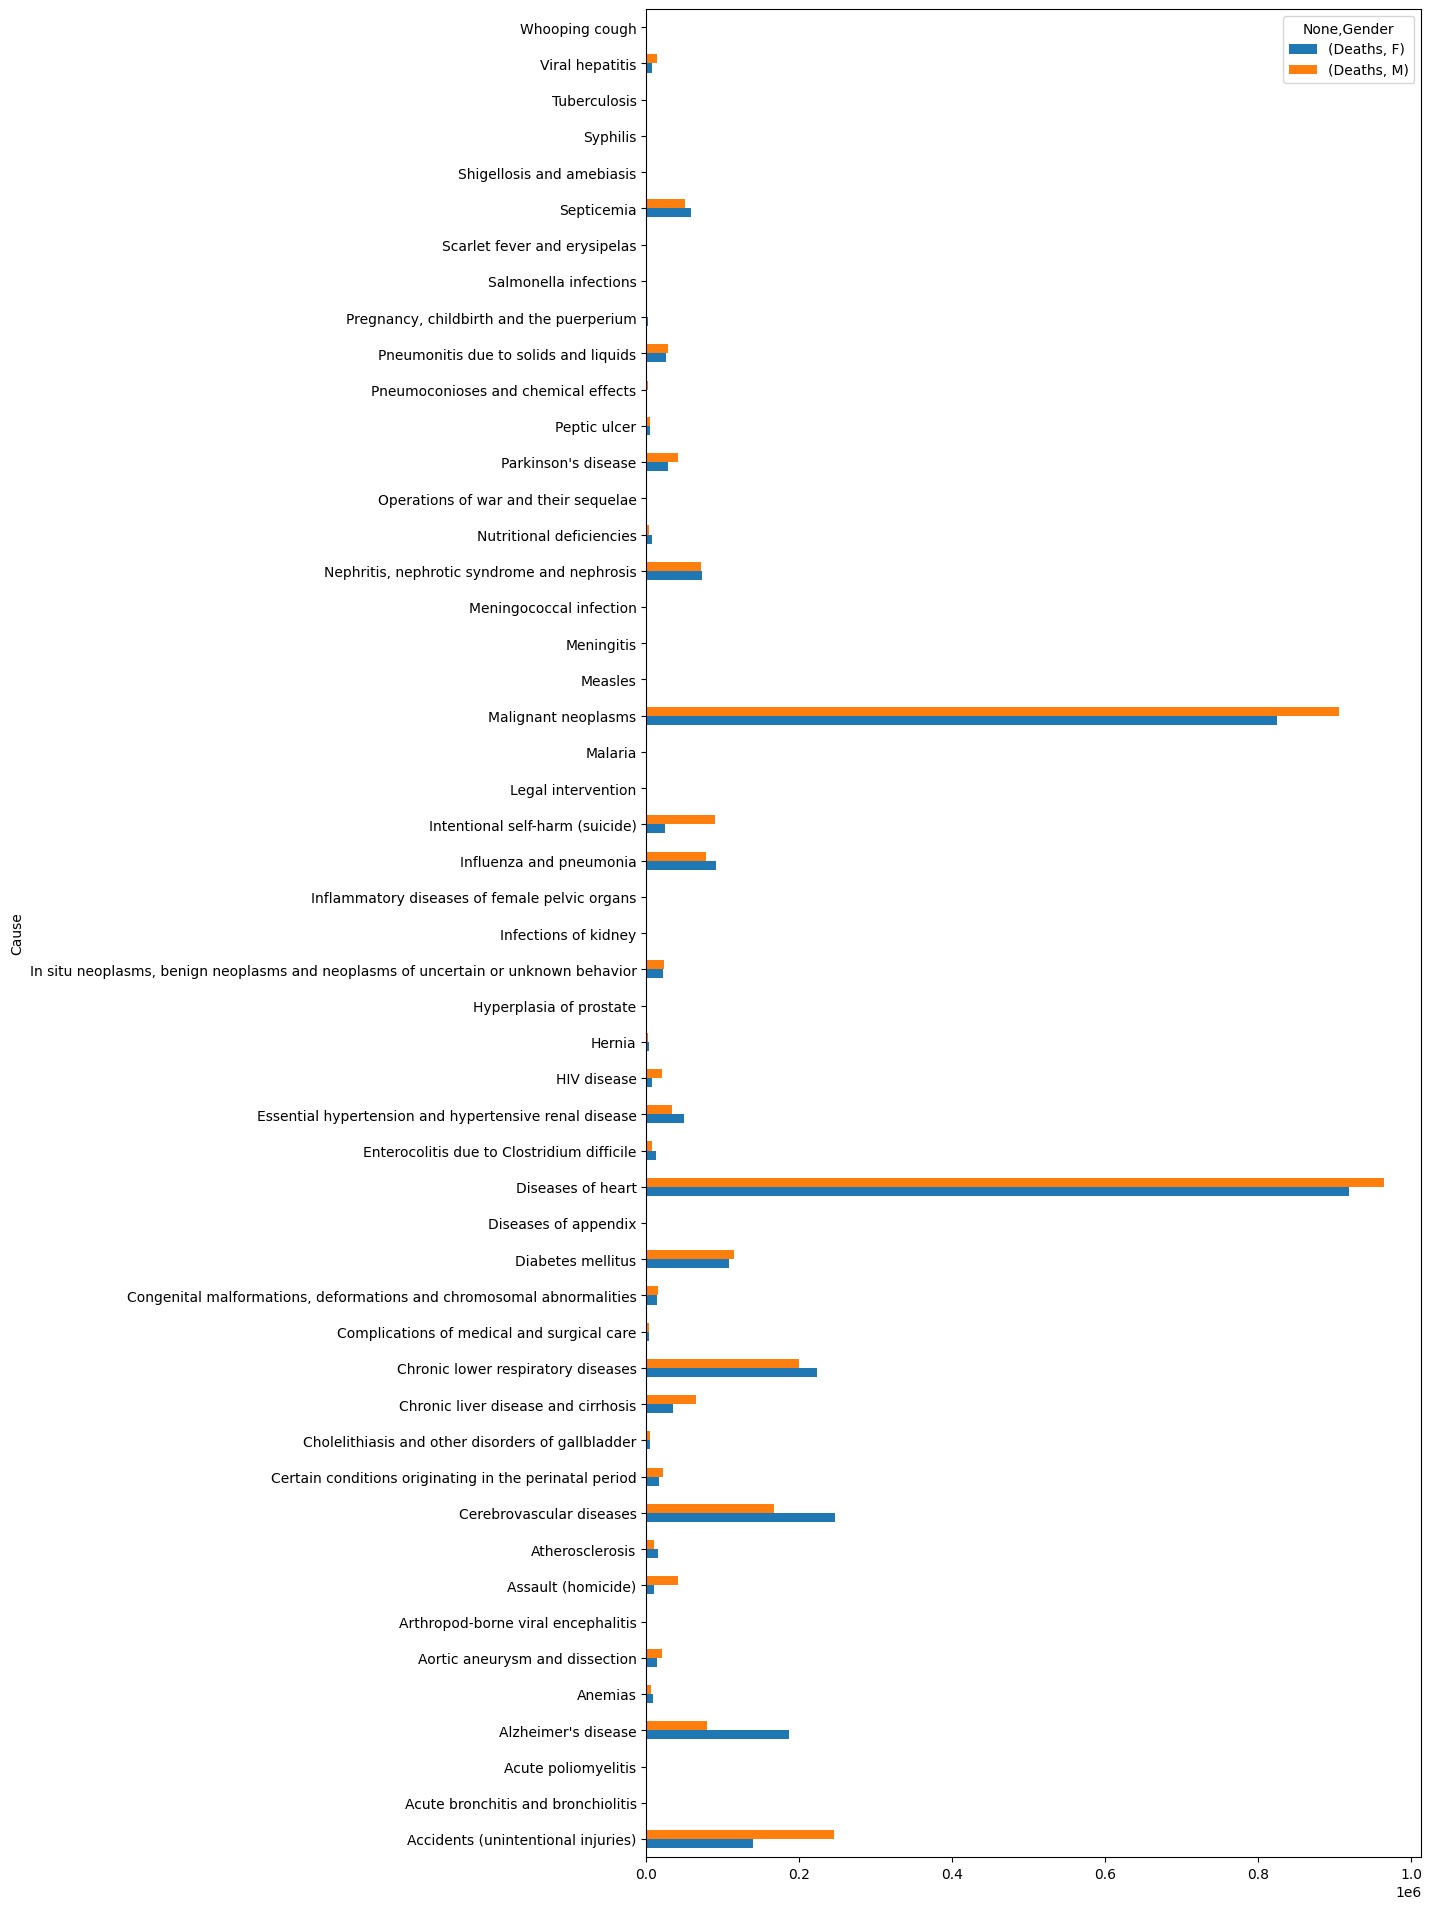

In [30]:
## write your code here
df\
.groupby(["Cause","Gender"])\
.agg({'Deaths':sum})\
.sort_values('Deaths', ascending = True)\
.unstack(1)\
.plot(kind="barh", legend=True, figsize=[10, 24])

<a id="causeXage"></a>
## Deaths: Causes of Death by Age

Because there are so many causes of death, let's choose just a few causes to visualize by age of death:
- "Alzheimer's disease" 
- "Diseases of heart" 
- "Malignant neoplasms" 
- "Accidents (unintentional injuries)"

<AxesSubplot: xlabel='Age'>

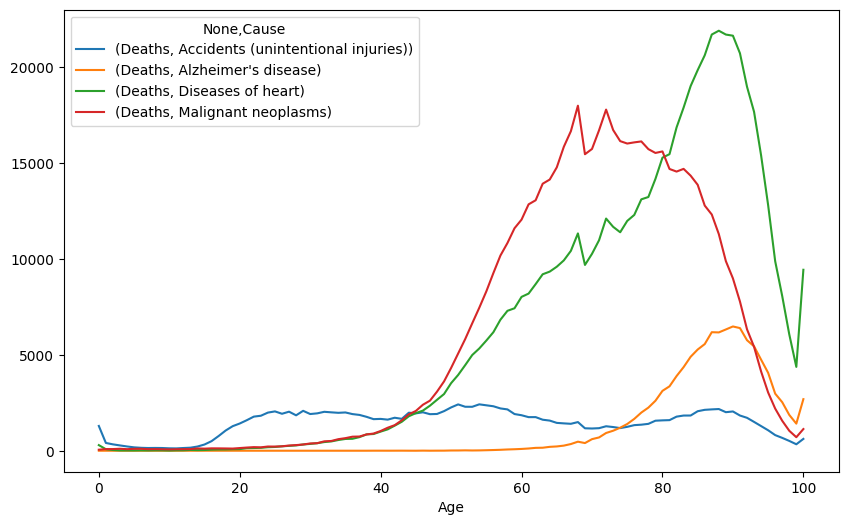

In [31]:
clist = ["Alzheimer's disease", 
         "Diseases of heart", 
         "Malignant neoplasms", 
         "Accidents (unintentional injuries)"]

df2015_clist = df2015[df2015["Cause"].isin(clist)] #isin

df2015_clist\
.groupby(["Age", "Cause"])\
.agg({'Deaths':sum})\
.sort_values('Deaths', ascending=False)\
.unstack(1)\
.plot(kind="line", legend=True, figsize=[10, 6])

<font color="green"> Discuss: What do you notice from the graph above? </font>

Conclusions:

1. People die from Diseases of the heart, Alzheimer's disease and from Malignant neoplasms mostly at old age, and the number of deaths from Accidents (unintentional injuries) almost does not change with age

<a id="causeXgenderXage"></a>
## Deaths: Causes of Death by Gender & Age

This visualization is particularly difficult because there are 2 genders x 3 years x 51 causes. It's virtually impossible to place all of this data on a single graph and make it easy to understand.

The best thing to do is to visualize some of the data, or just the data that is most interesting.

C:\Users\danpl\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


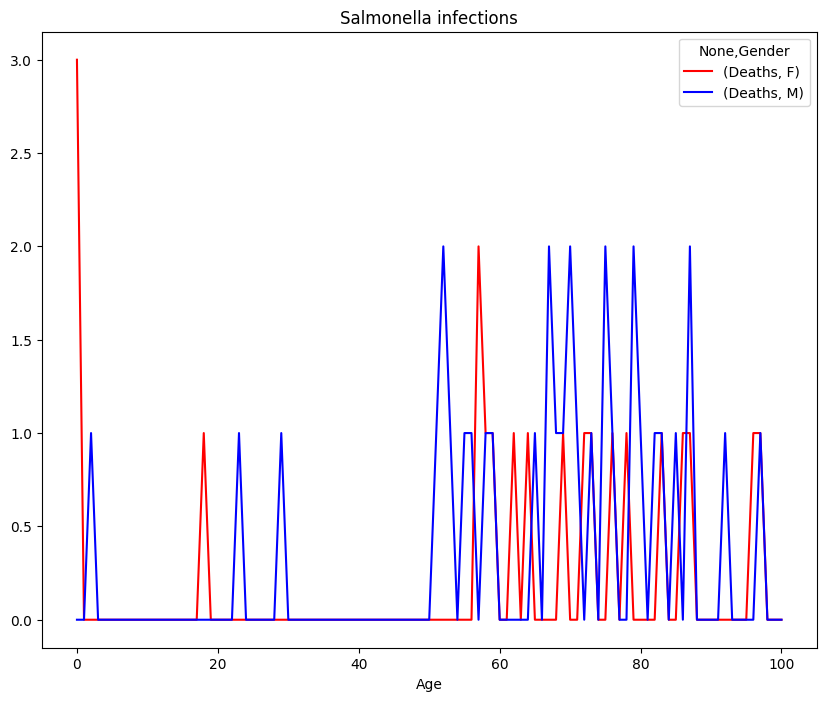

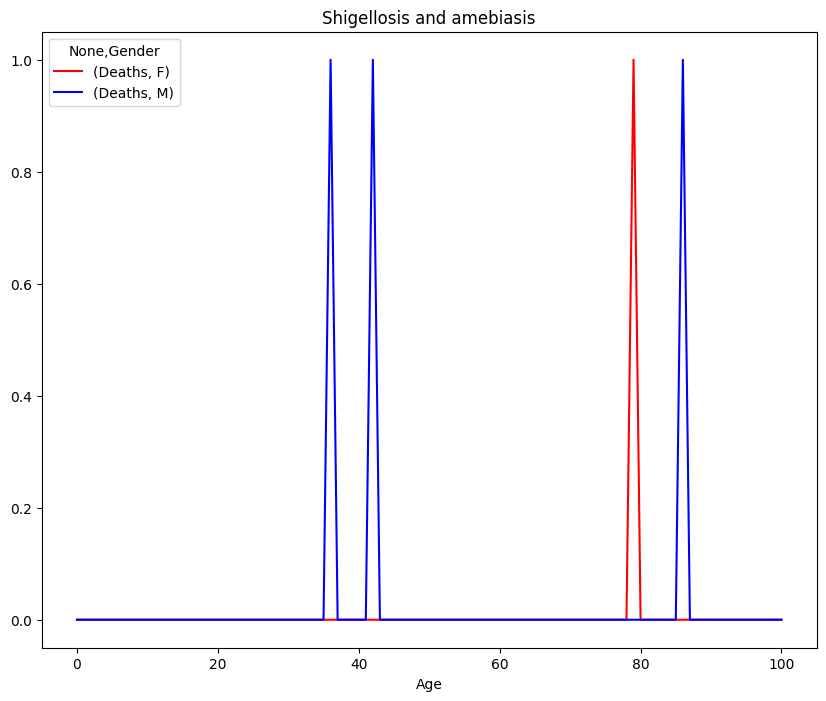

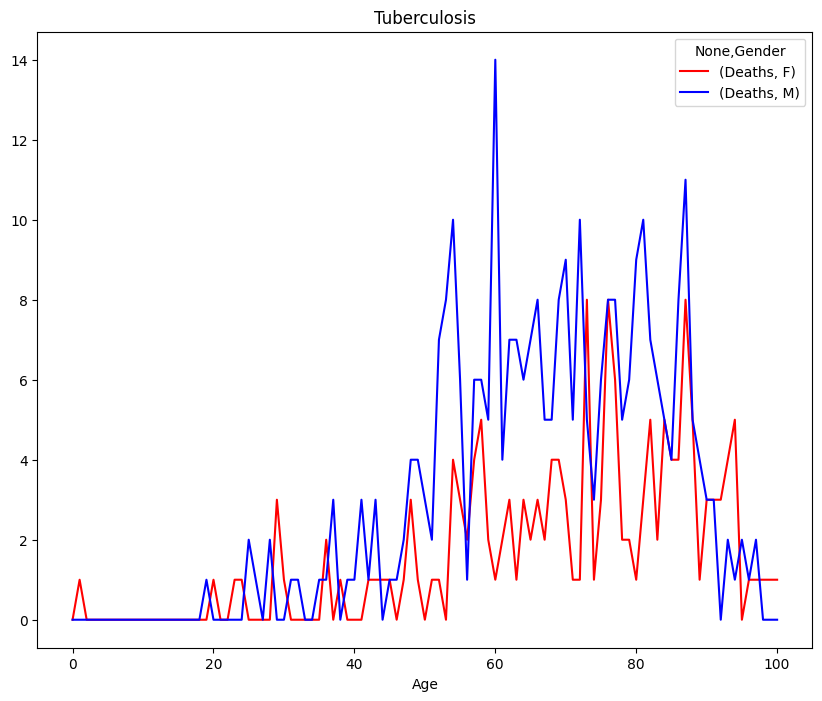

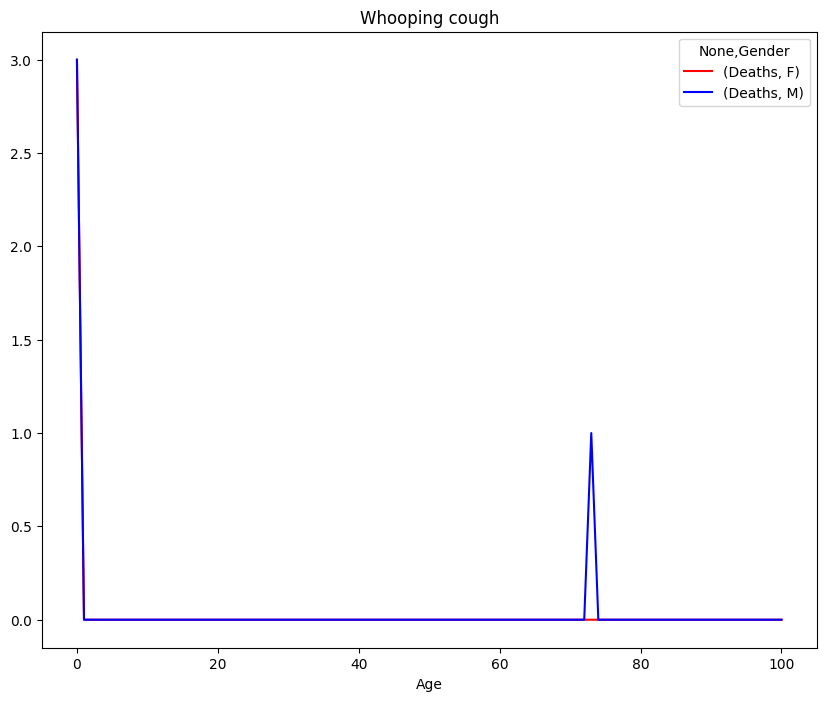

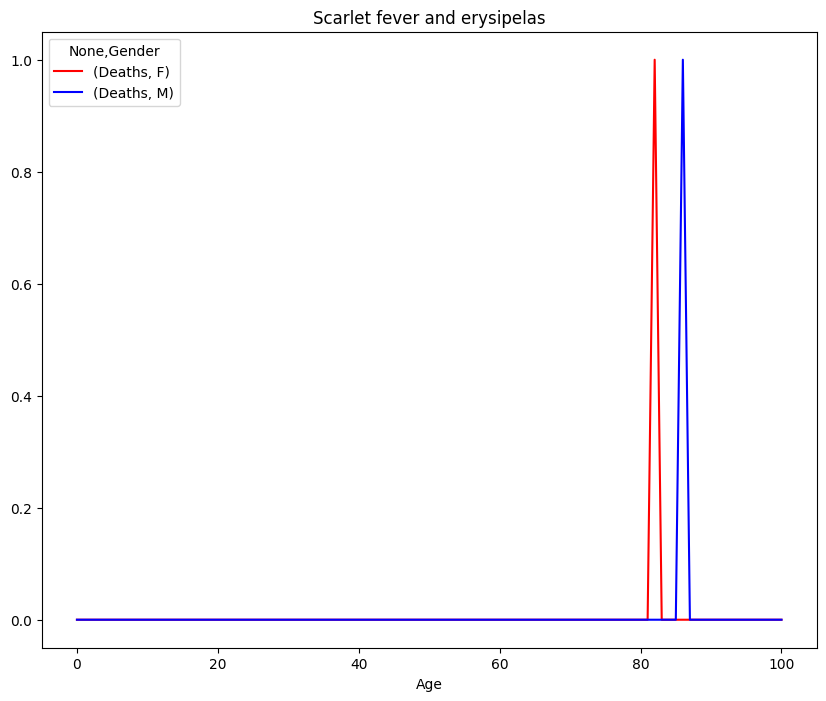

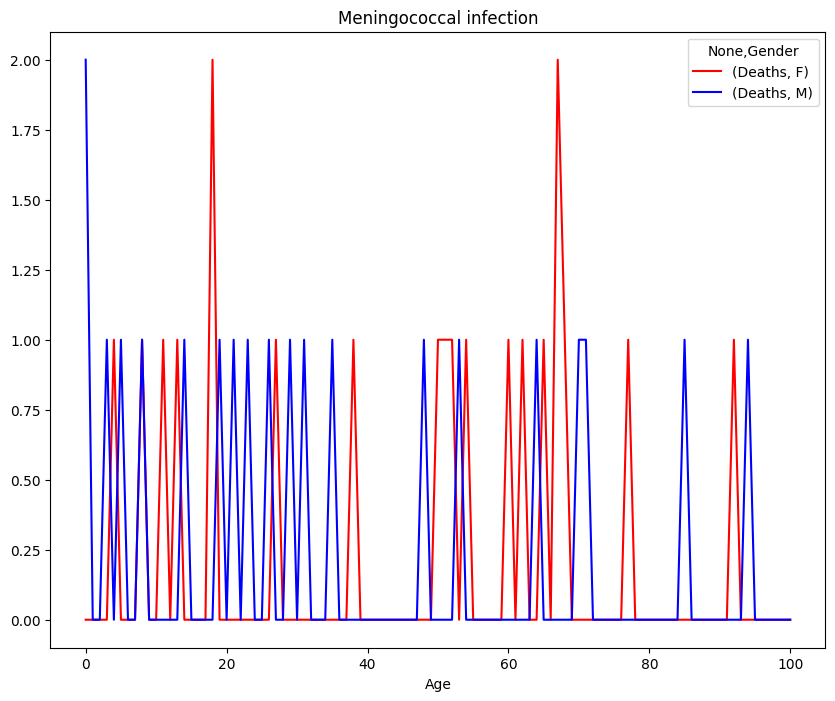

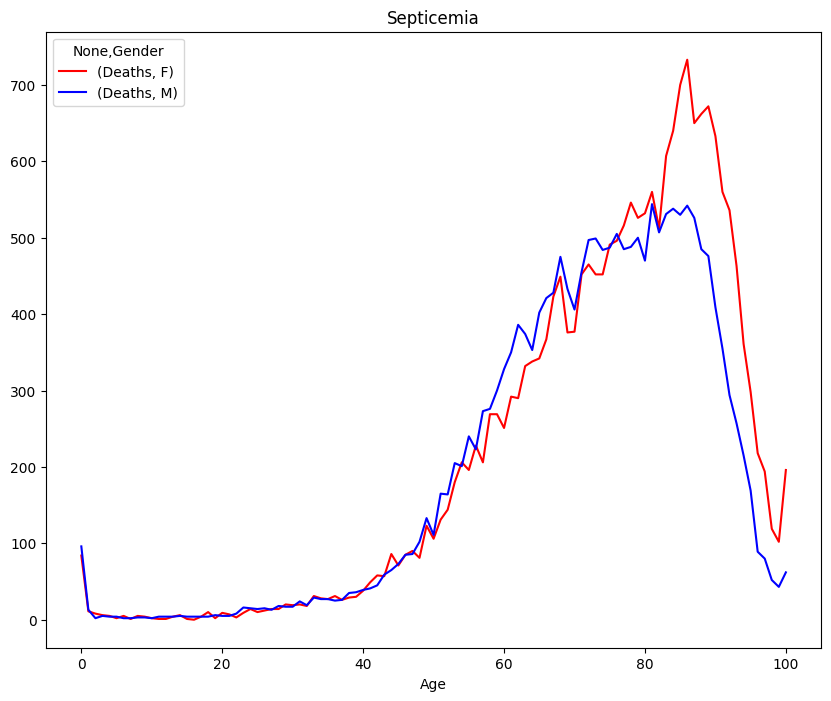

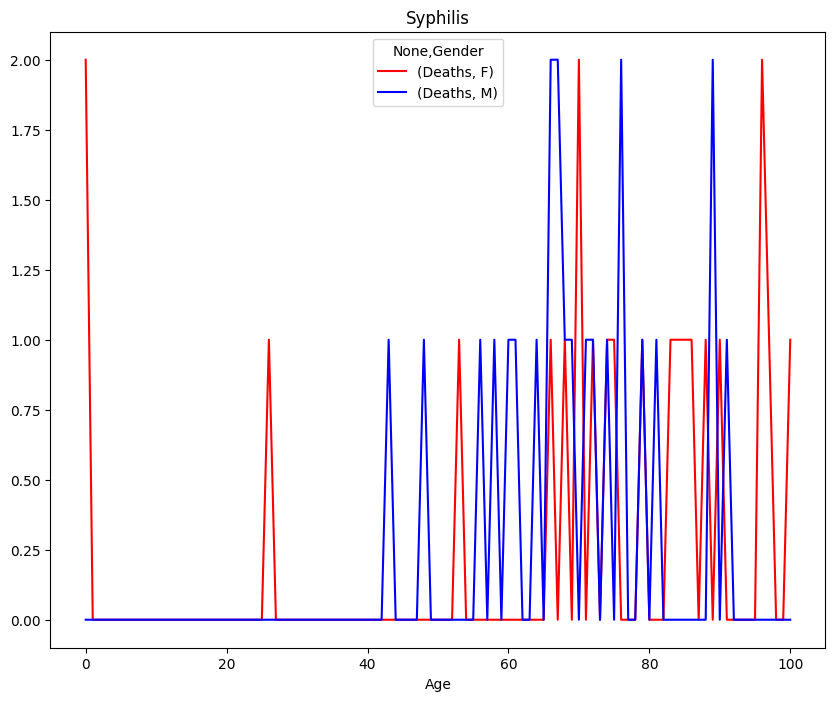

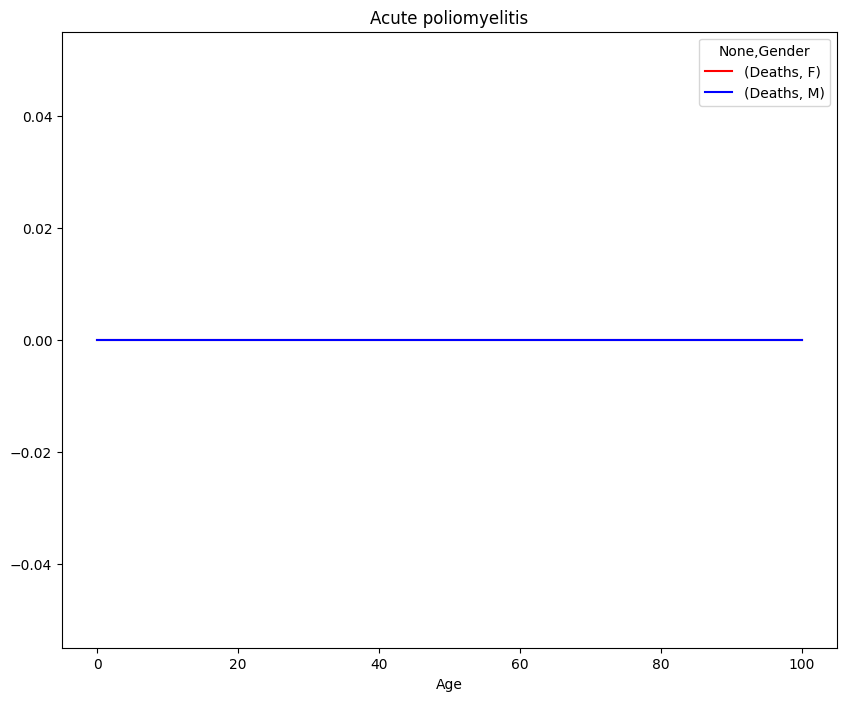

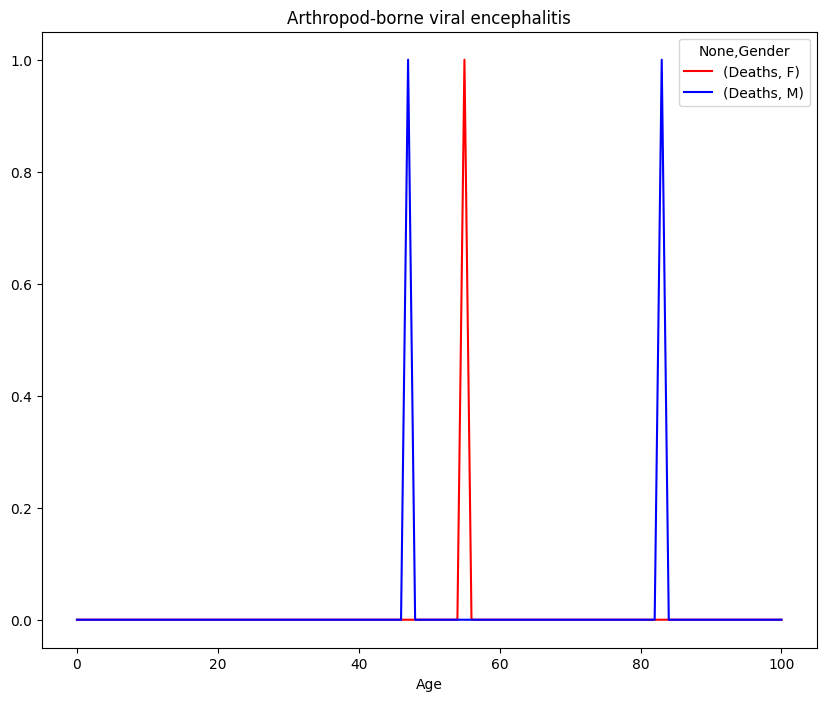

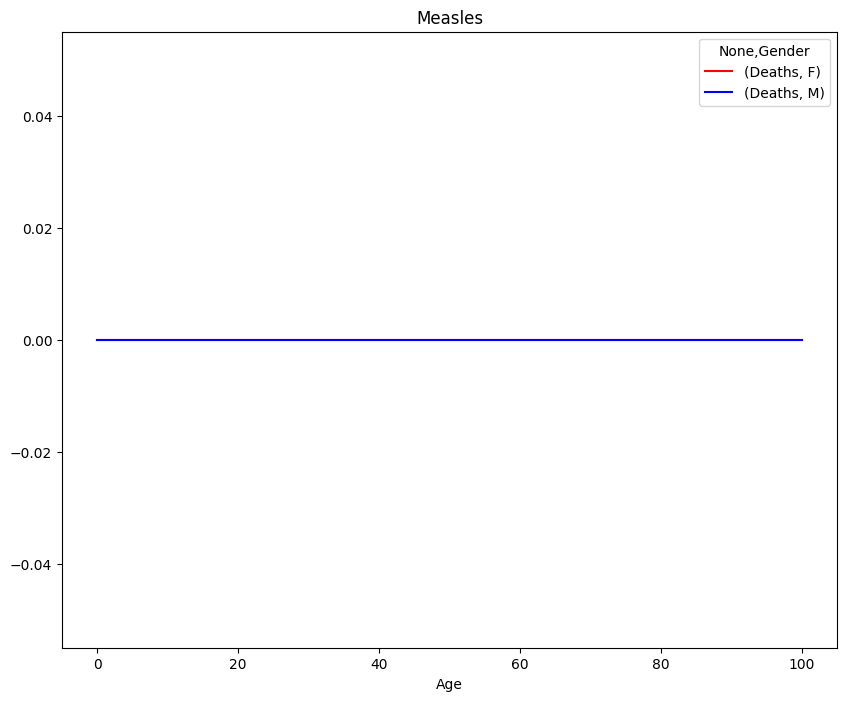

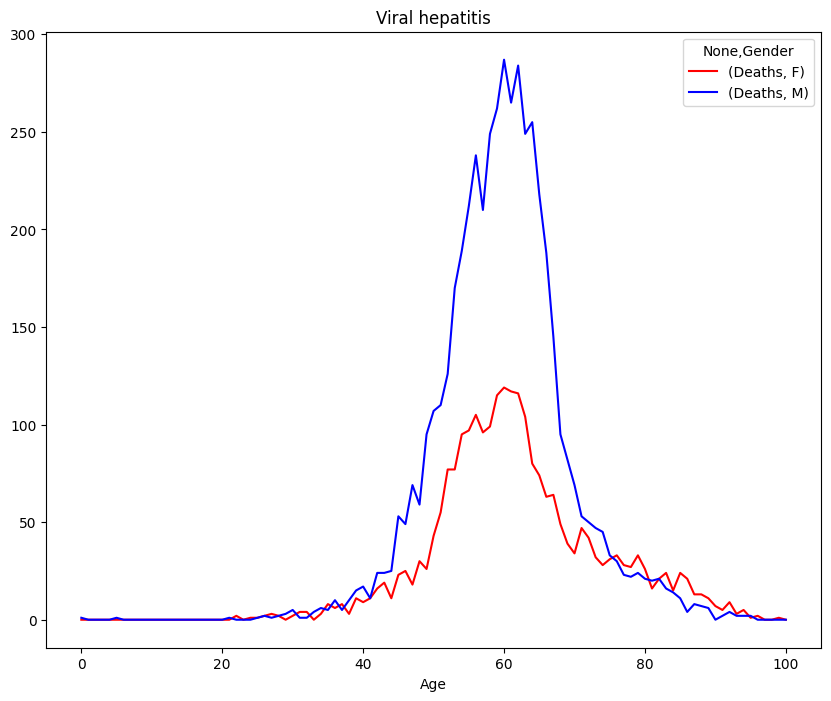

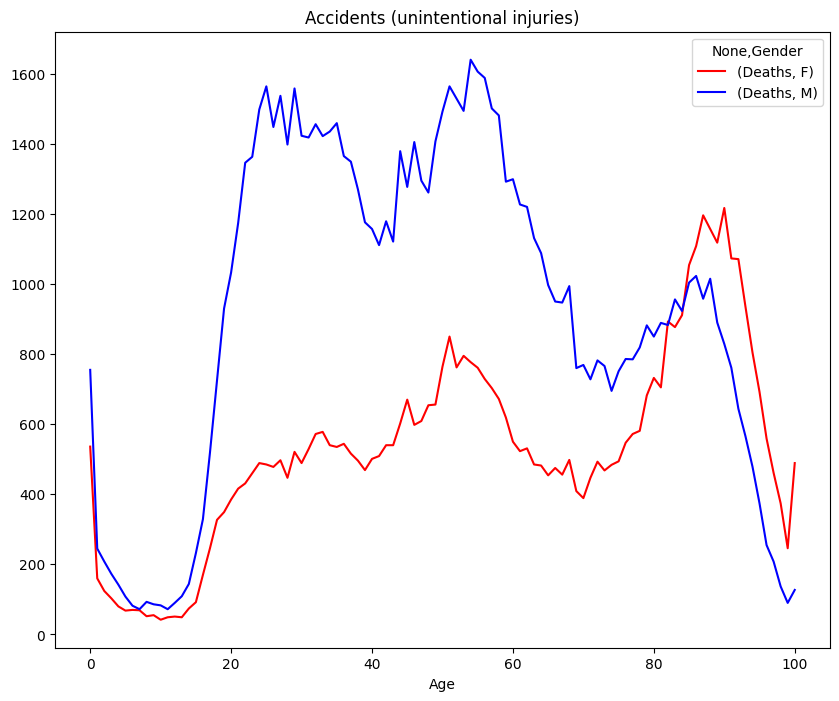

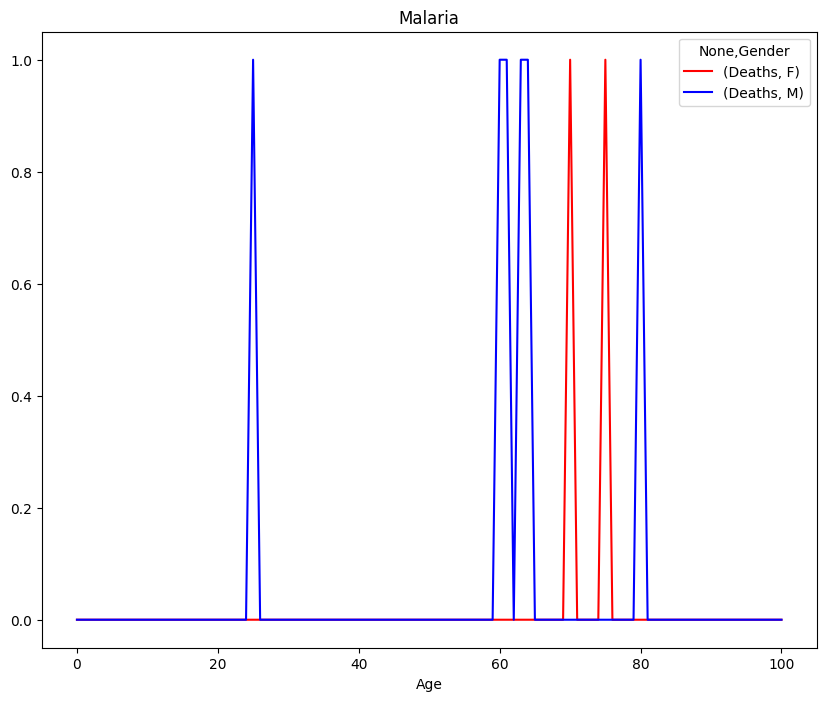

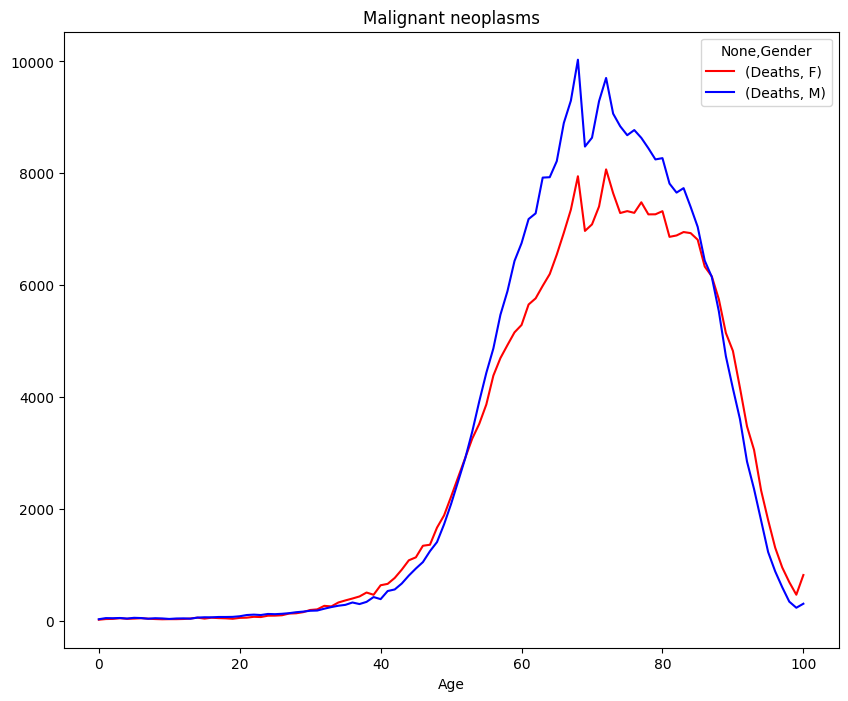

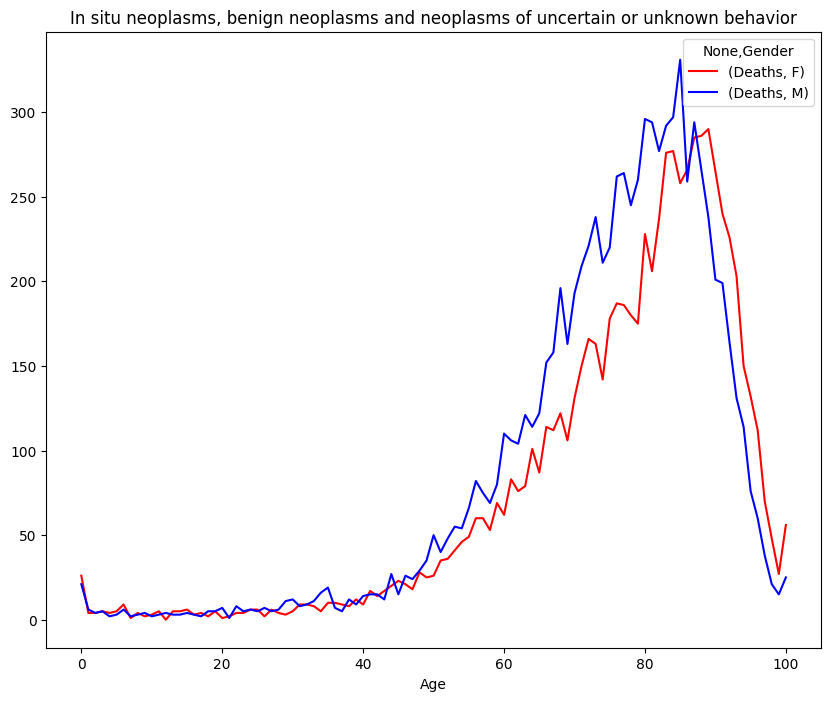

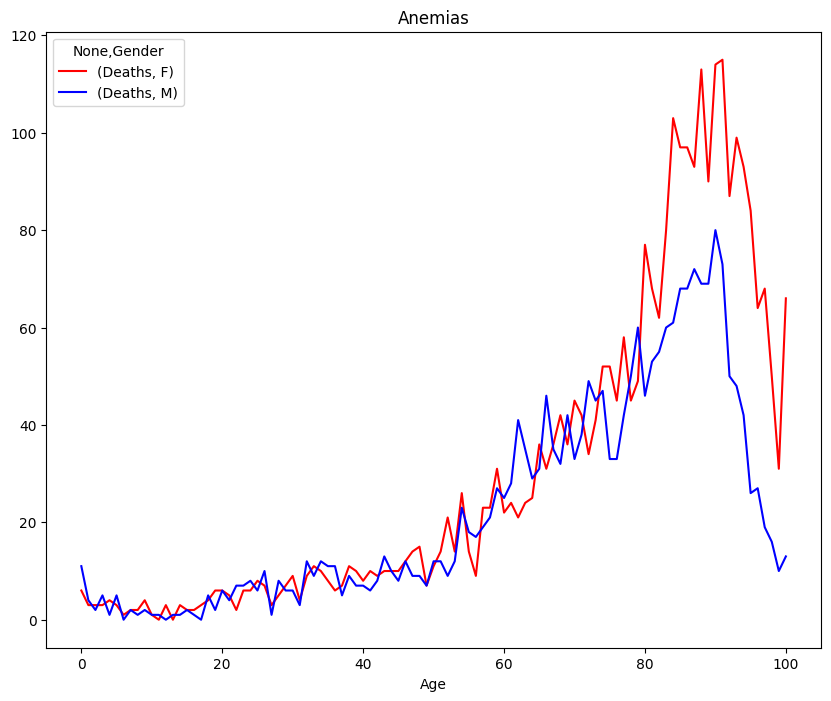

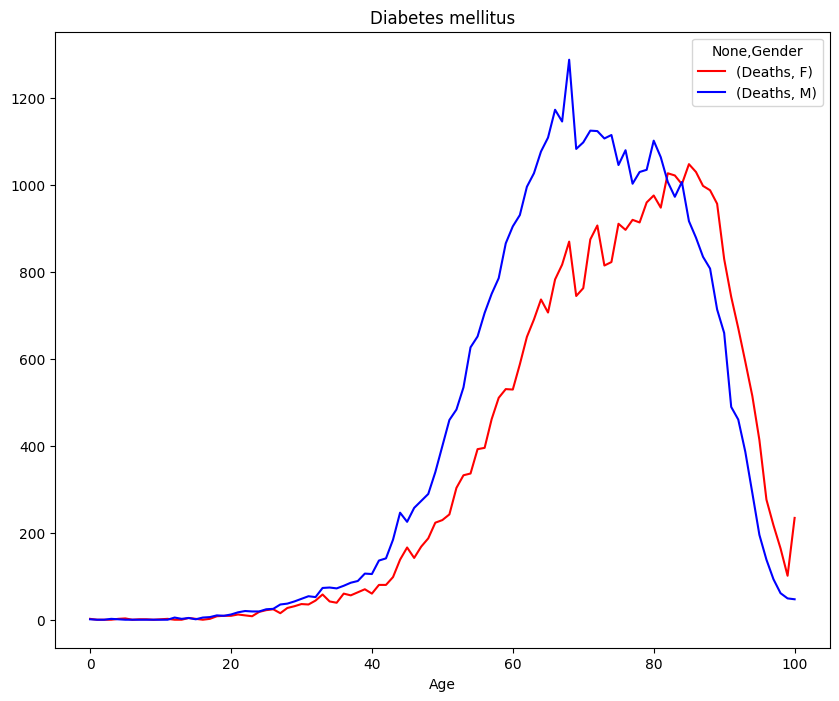

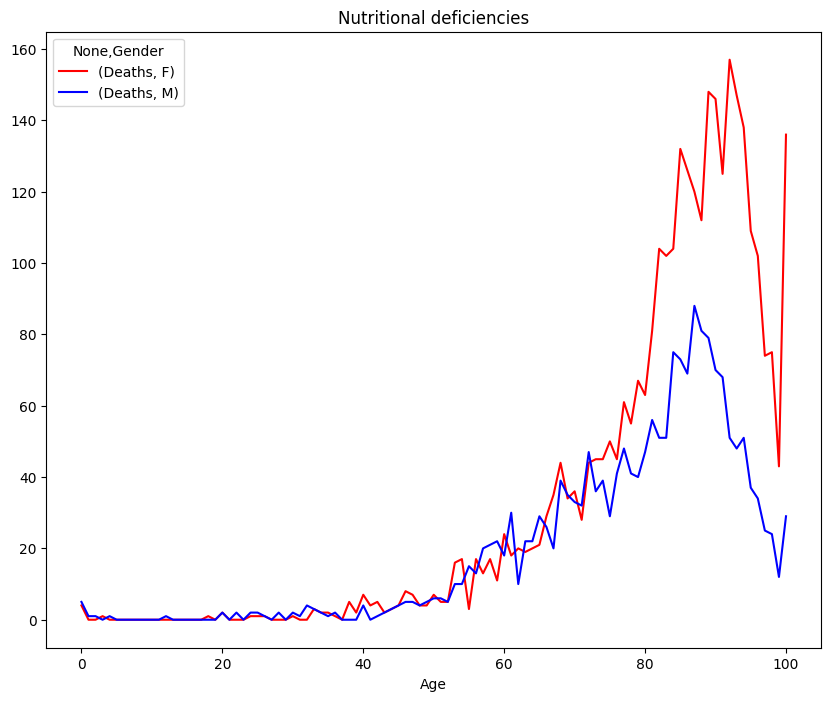

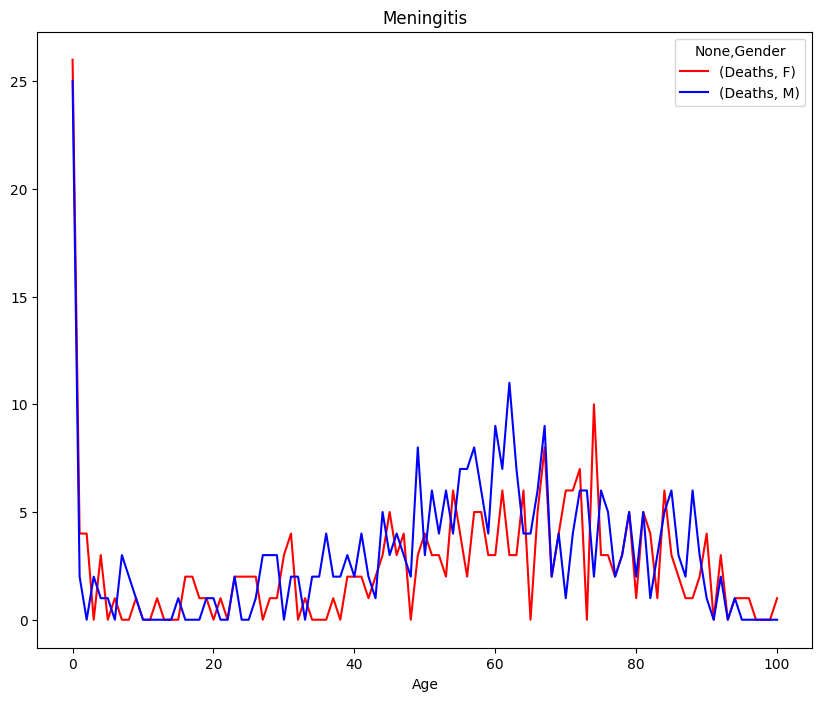

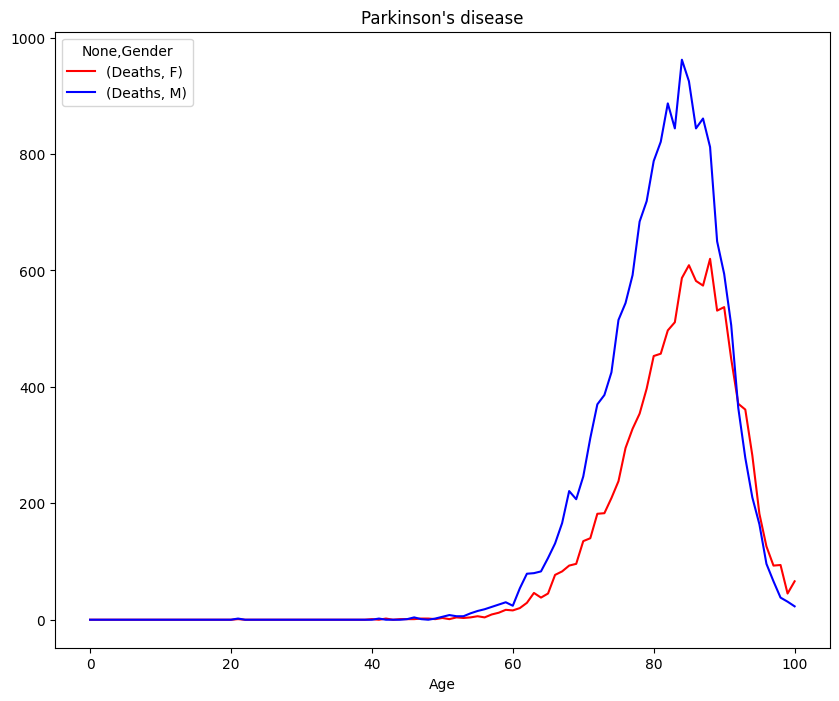

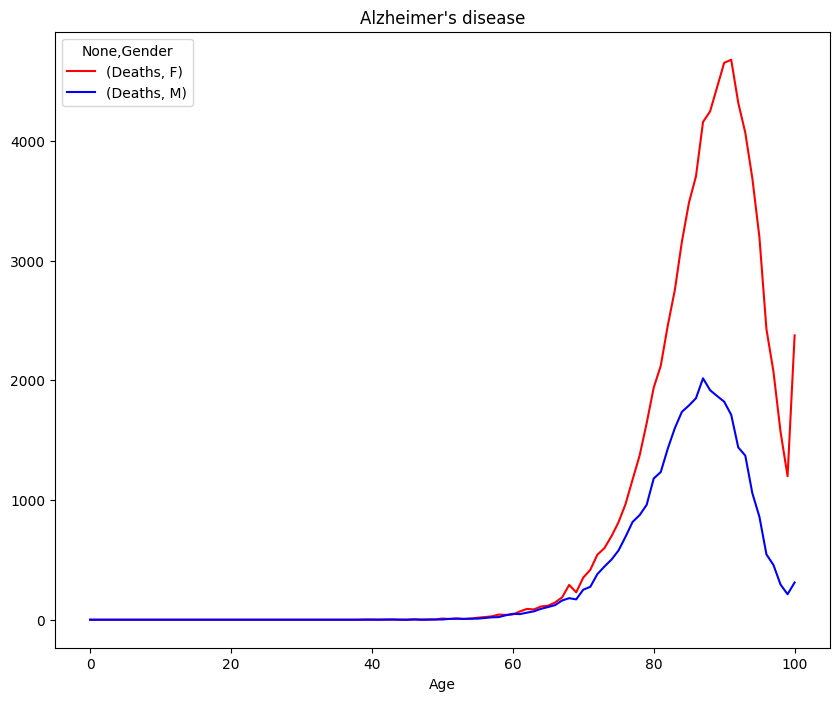

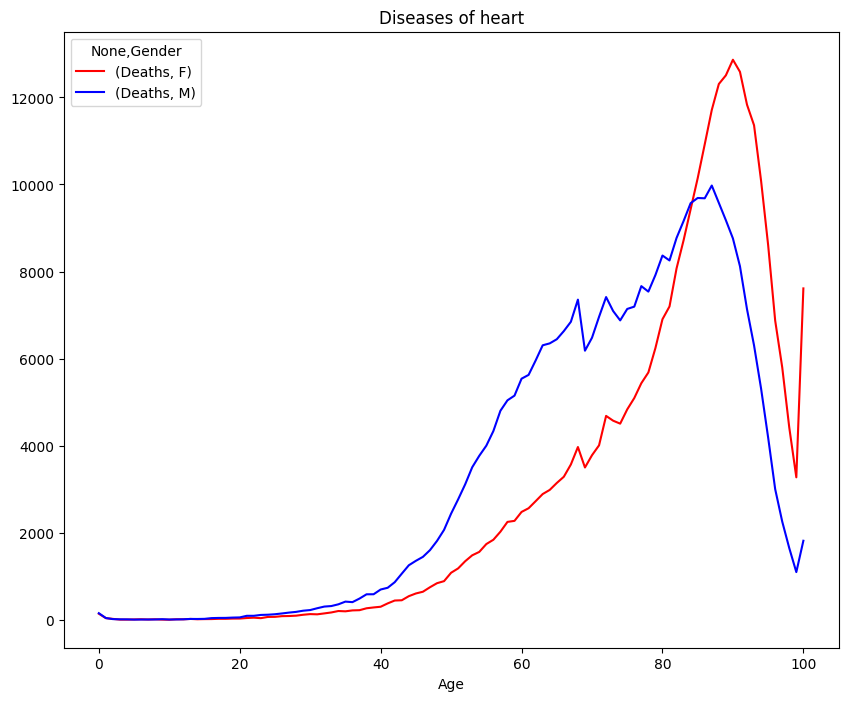

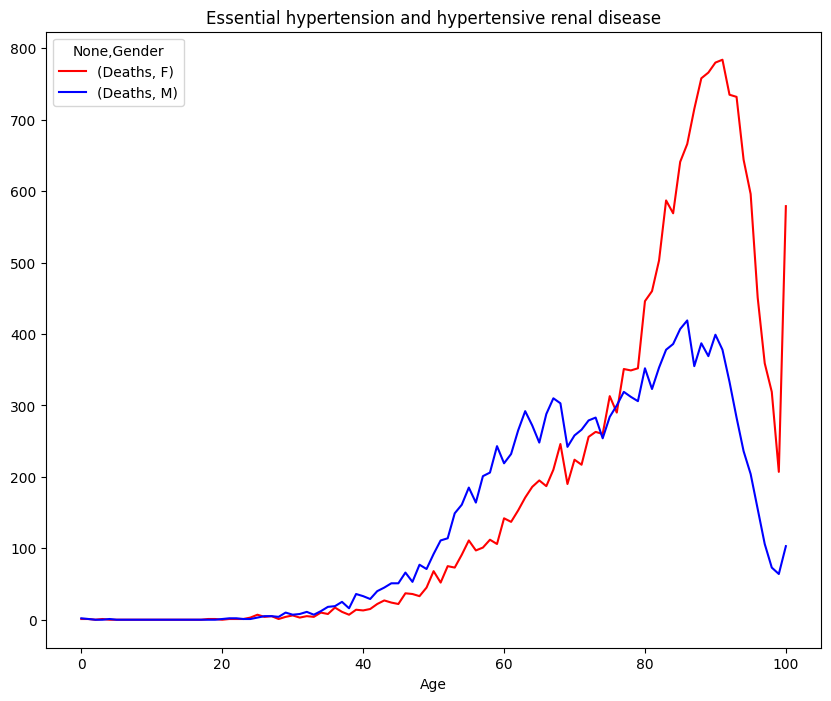

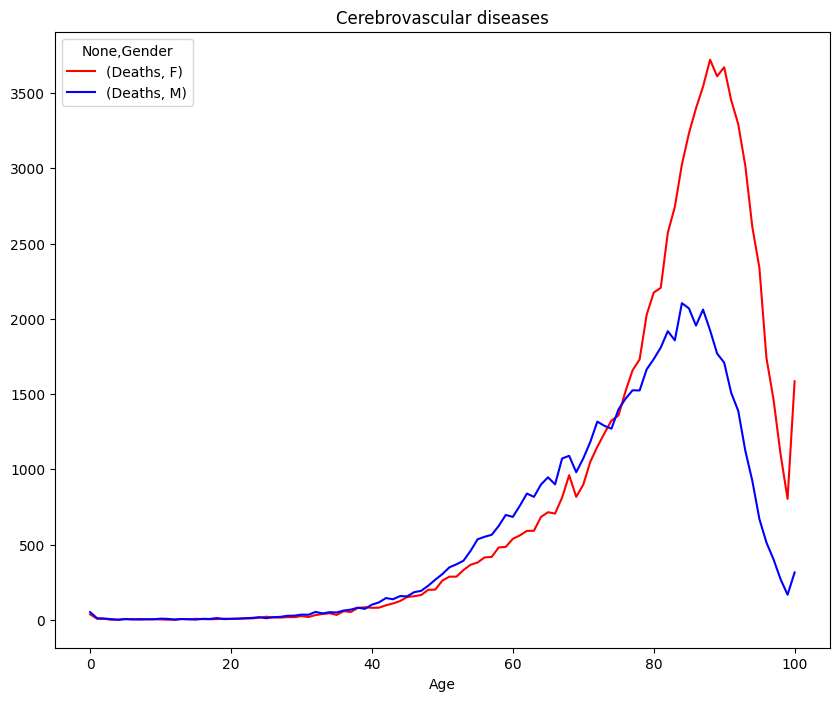

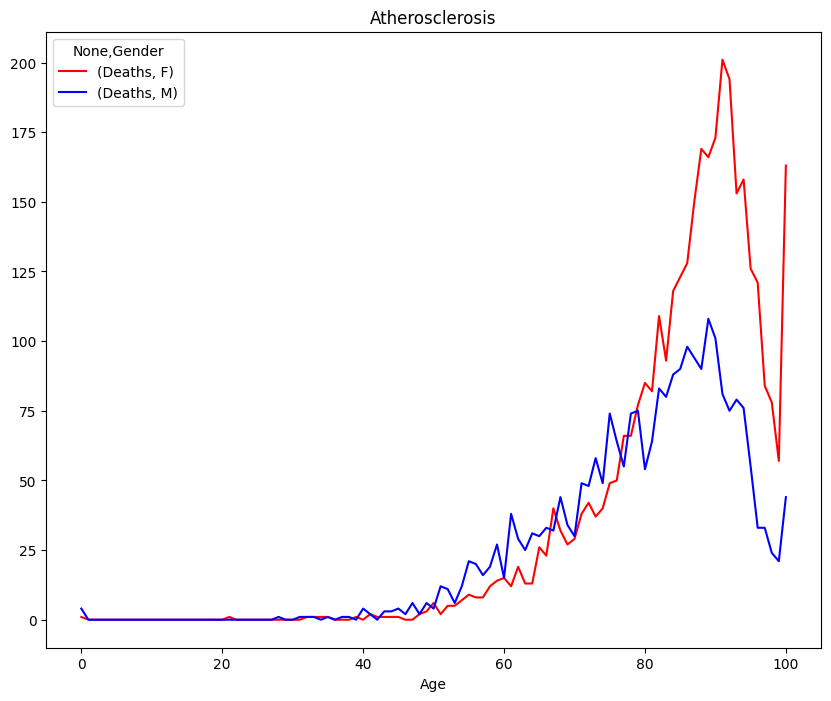

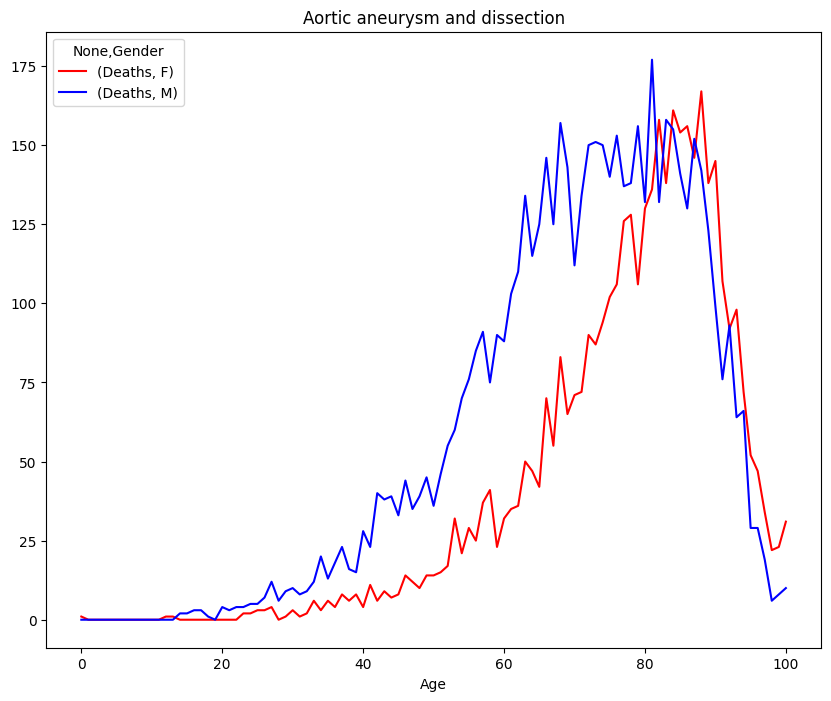

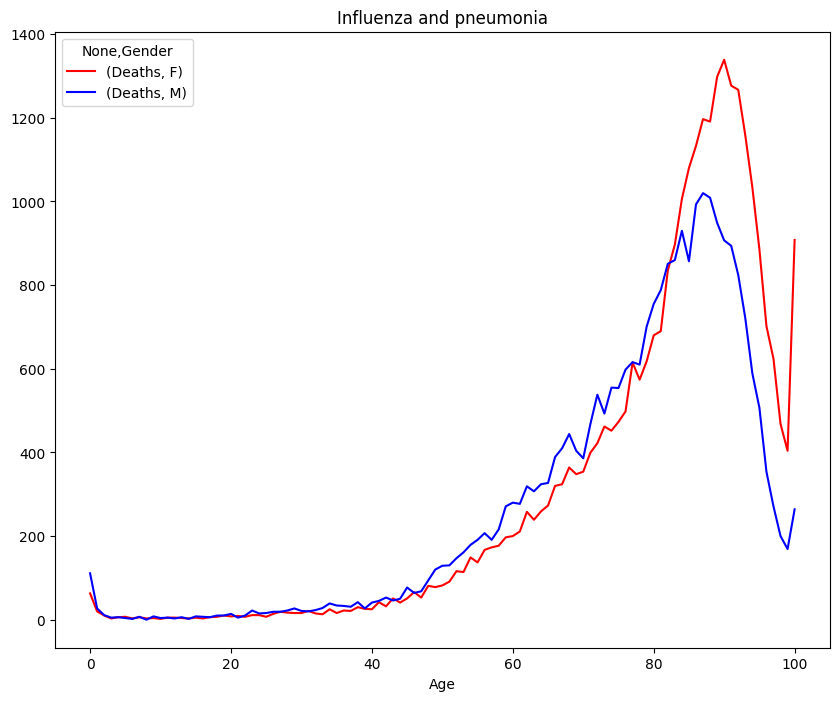

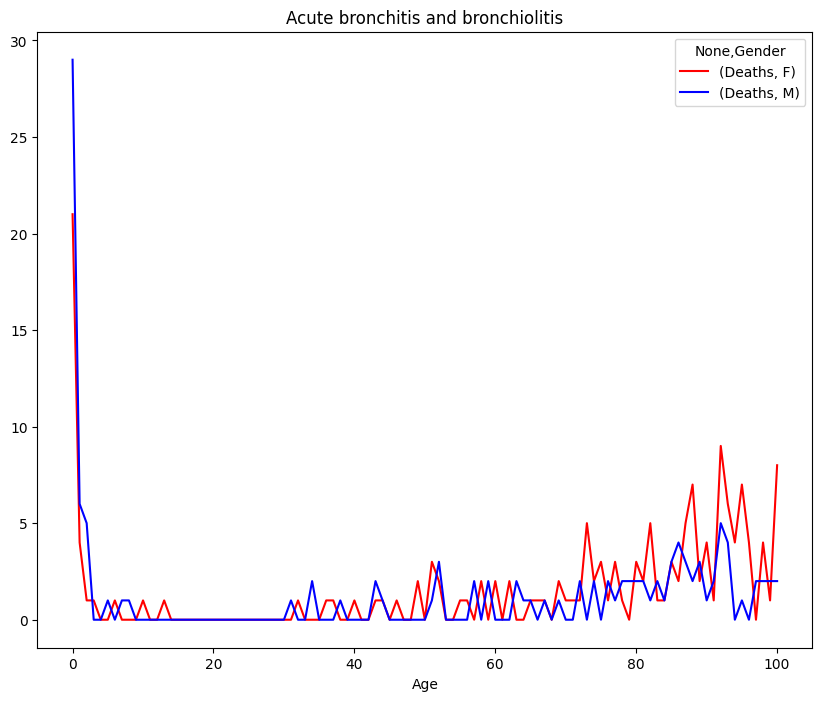

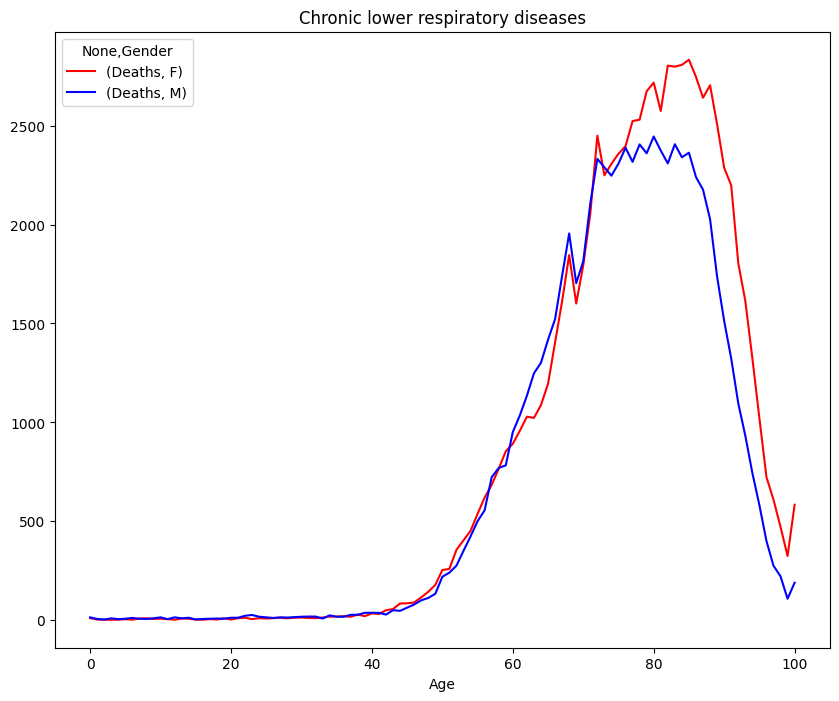

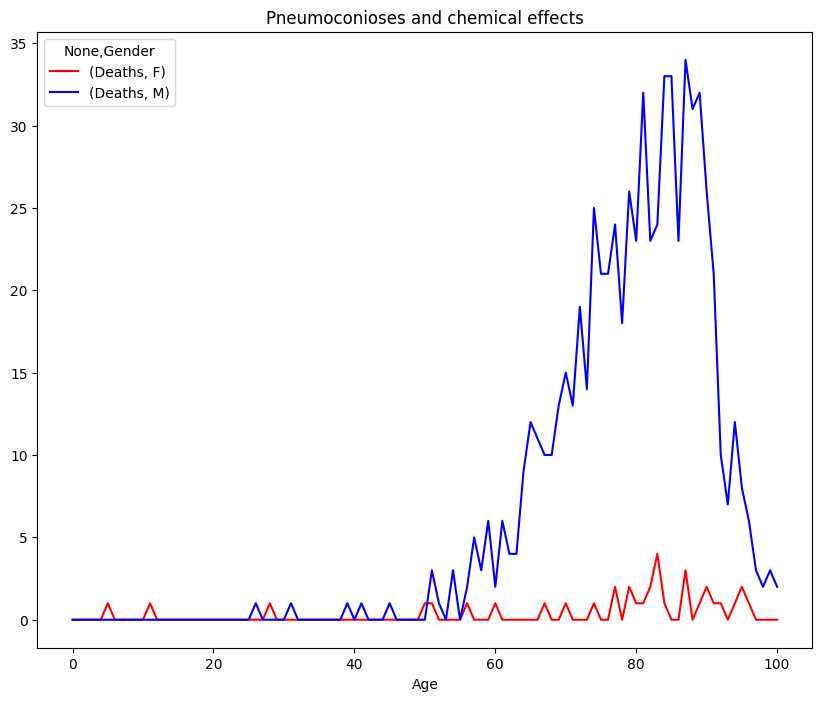

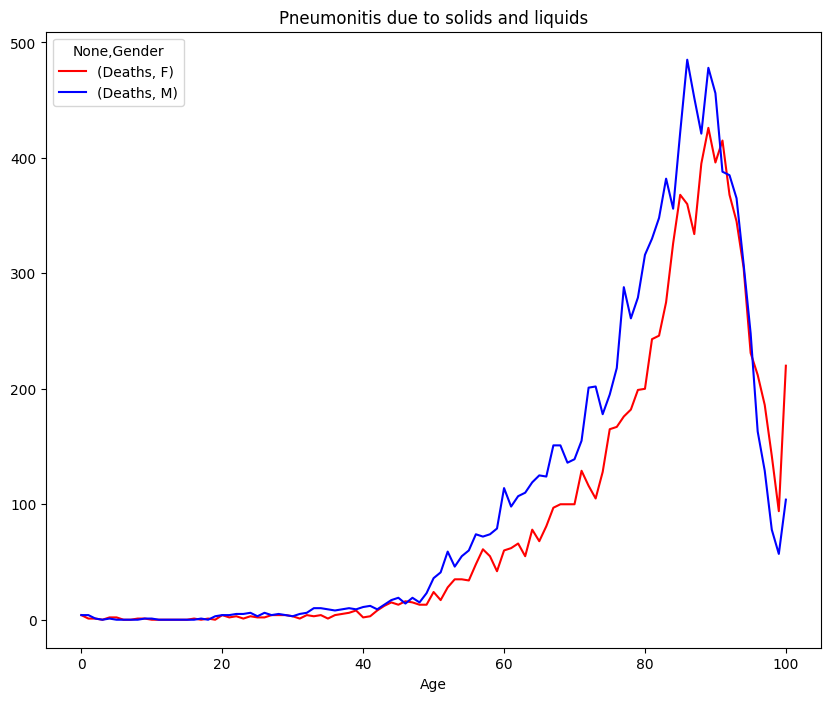

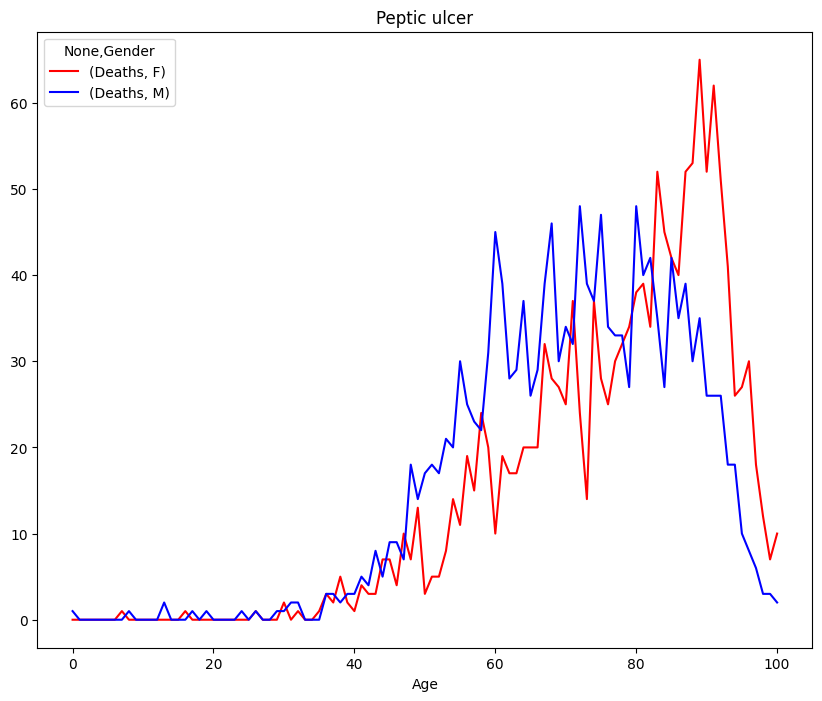

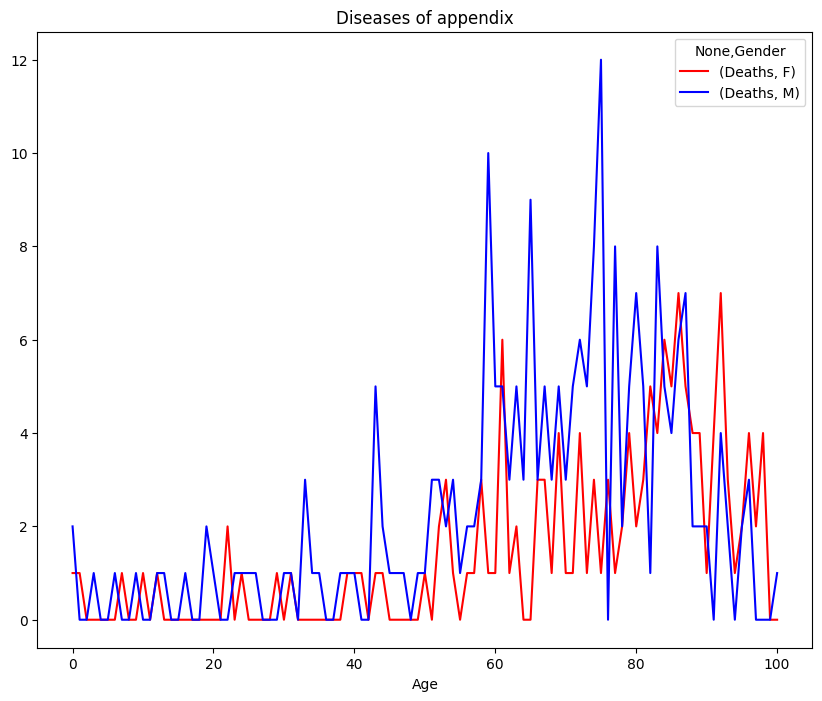

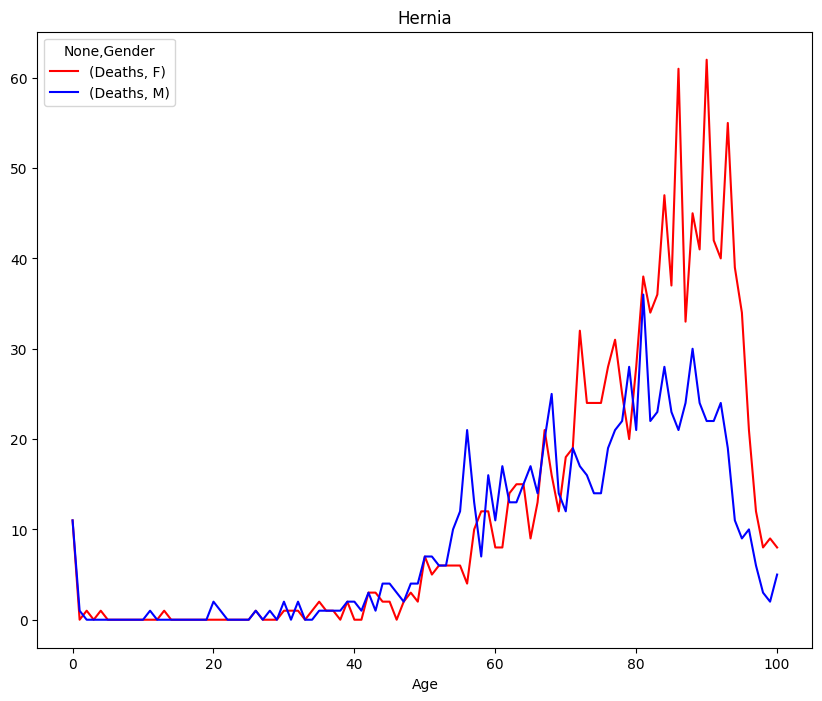

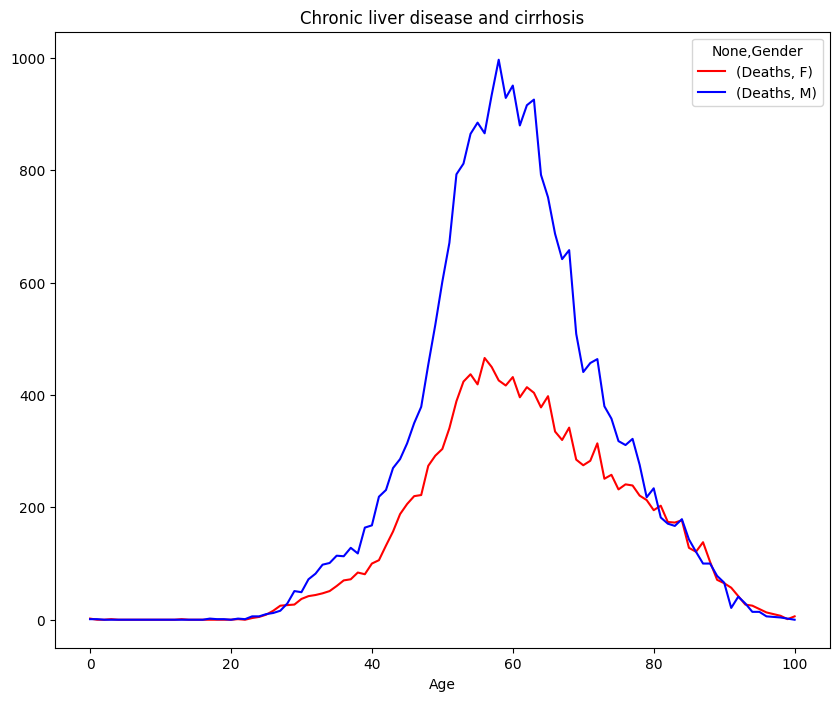

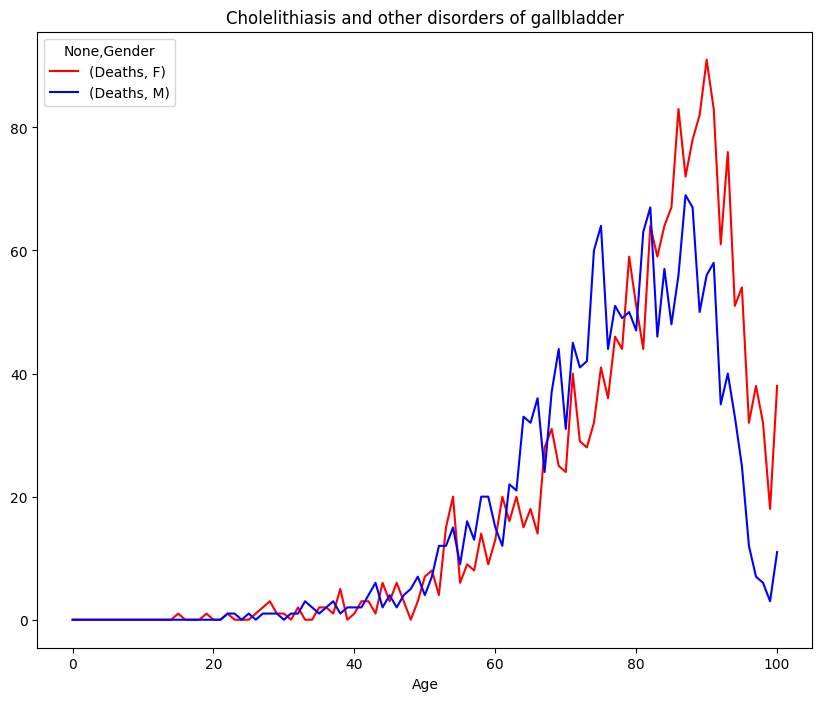

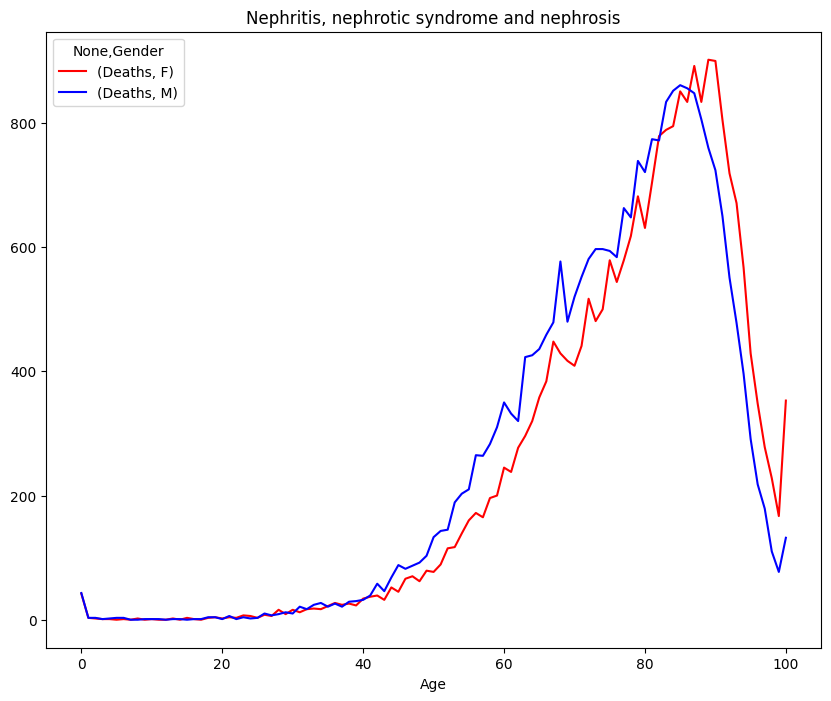

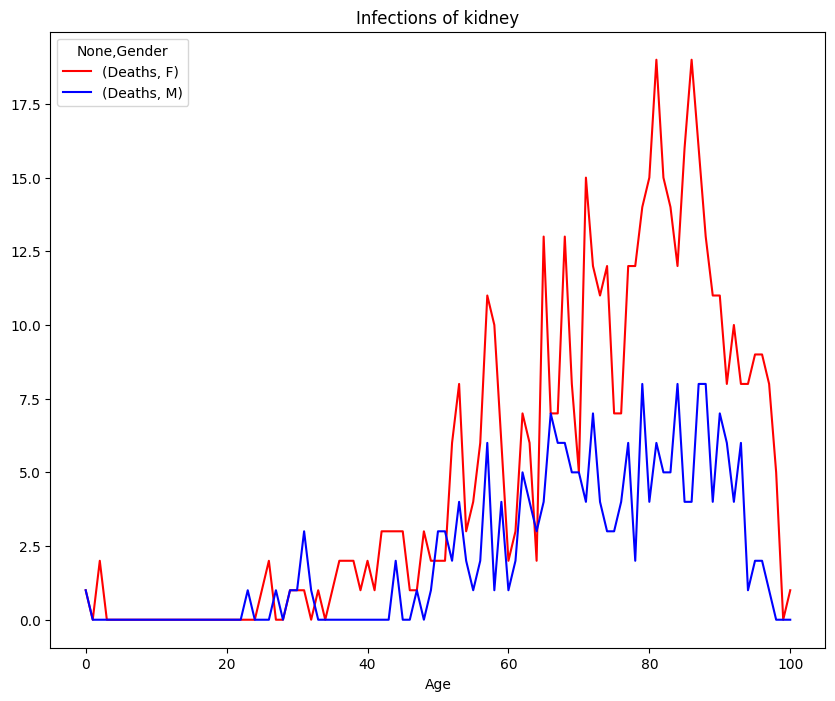

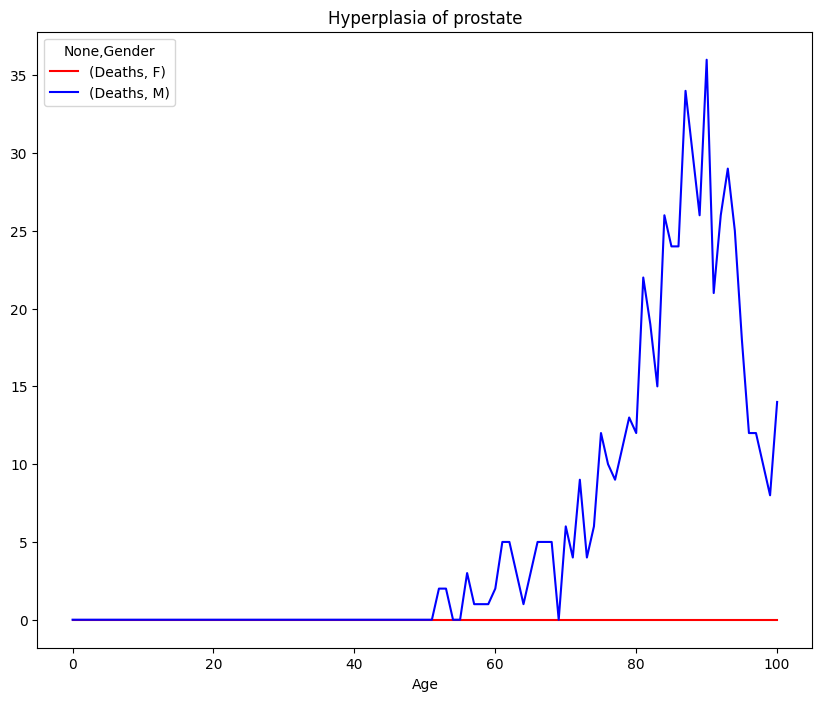

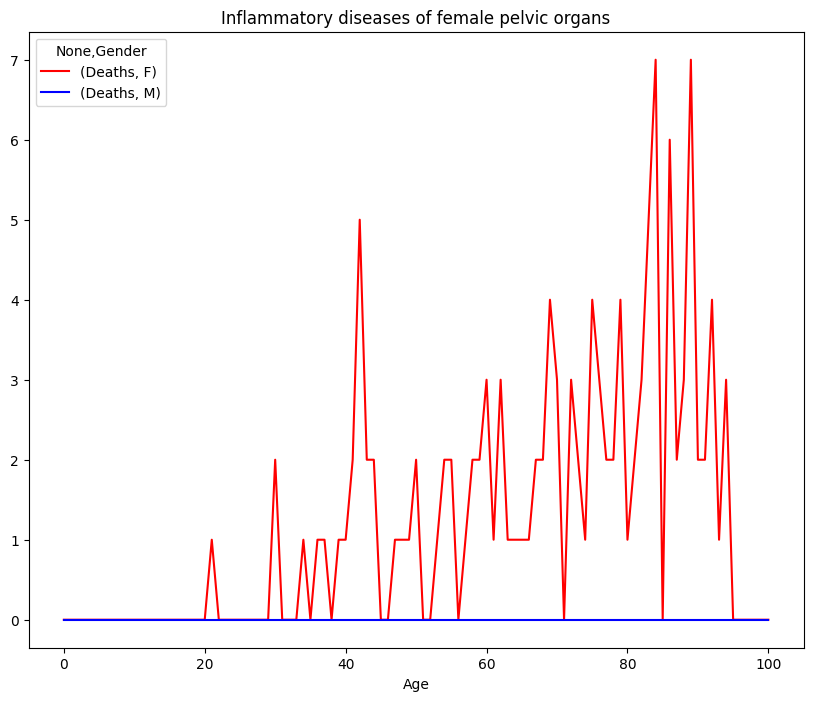

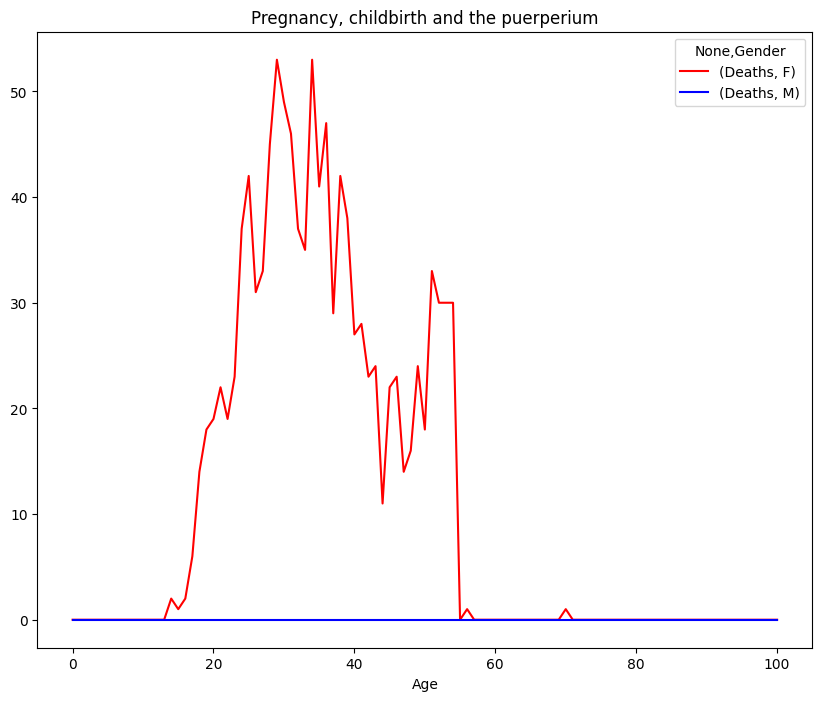

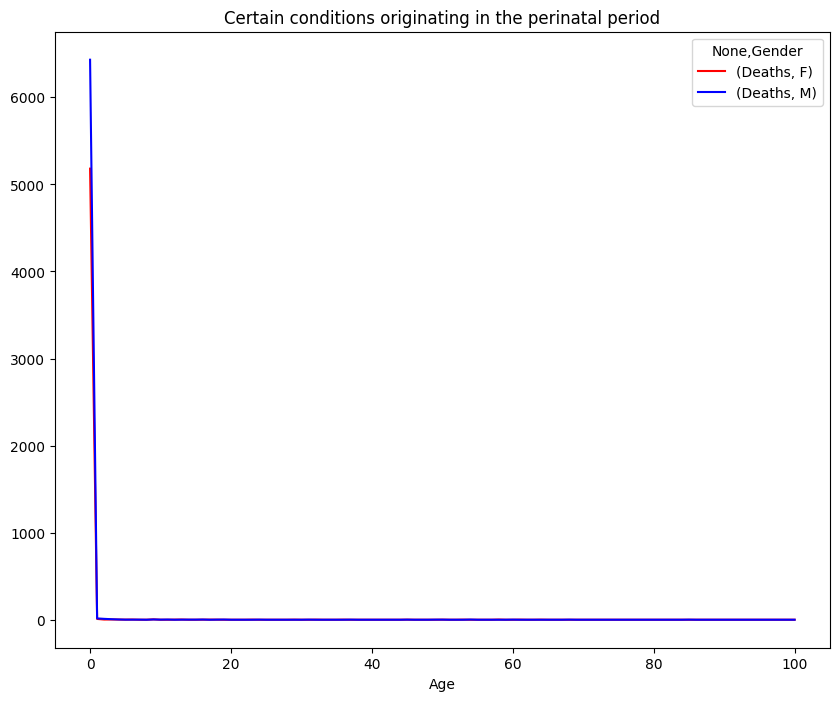

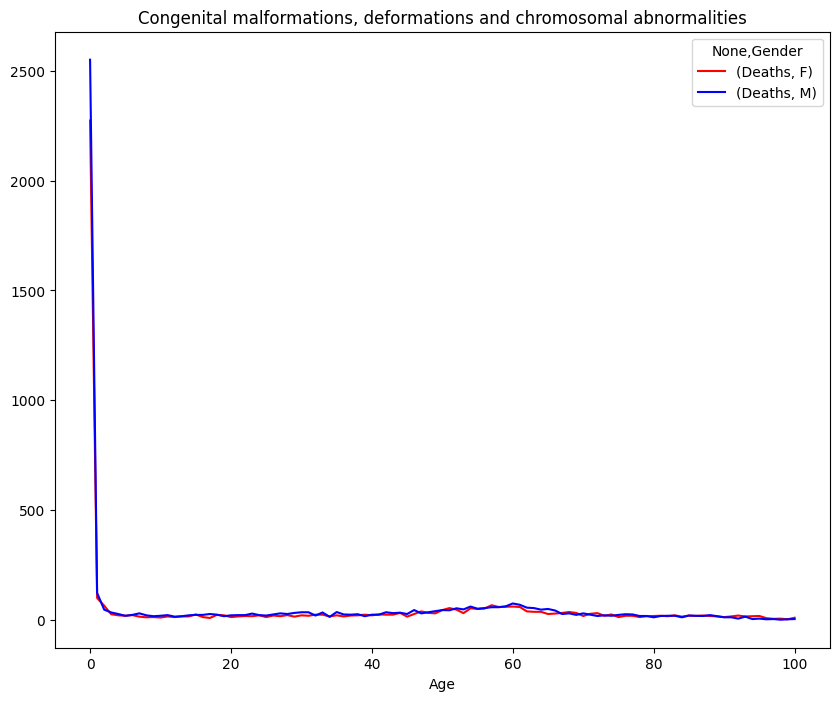

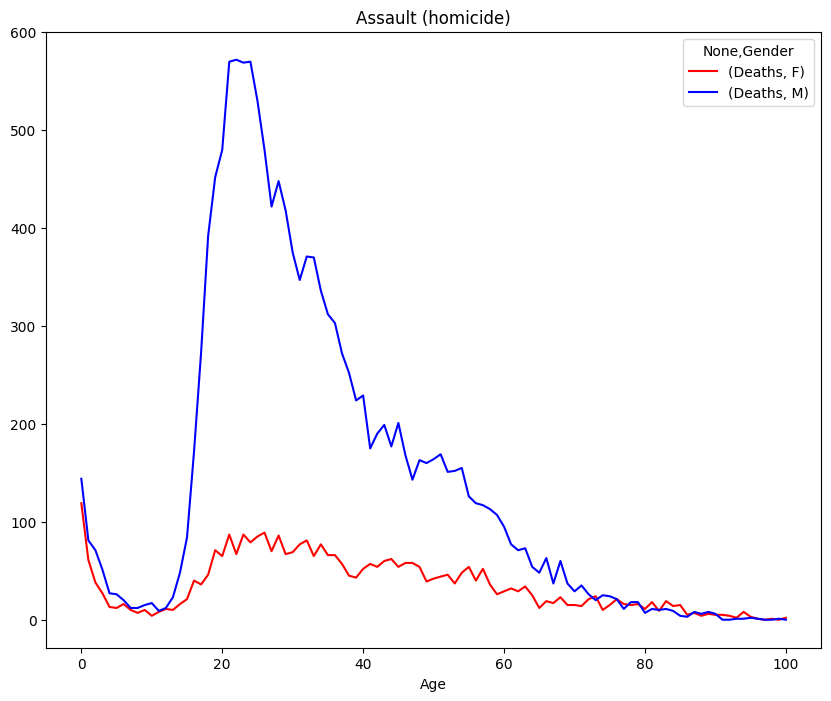

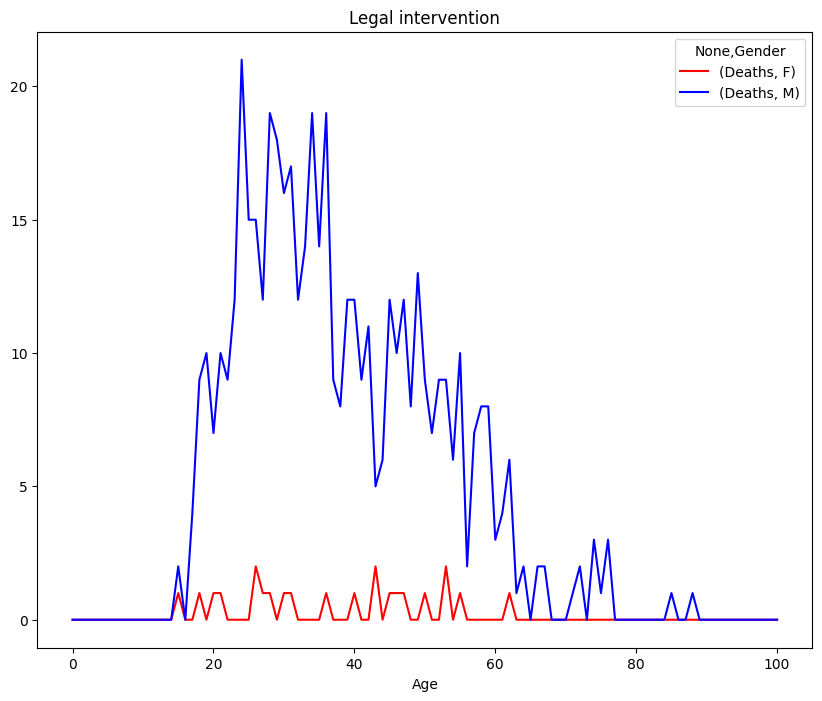

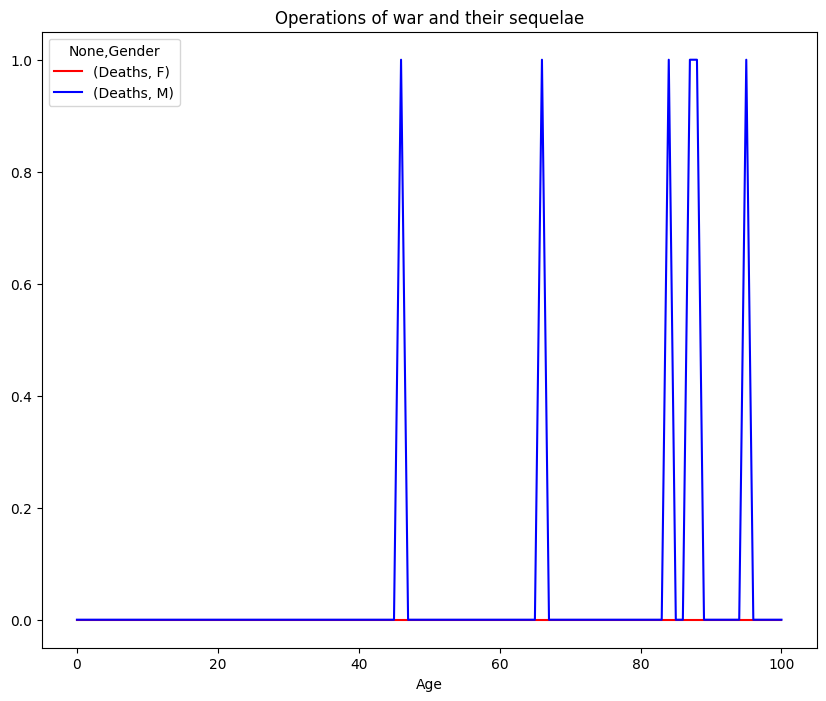

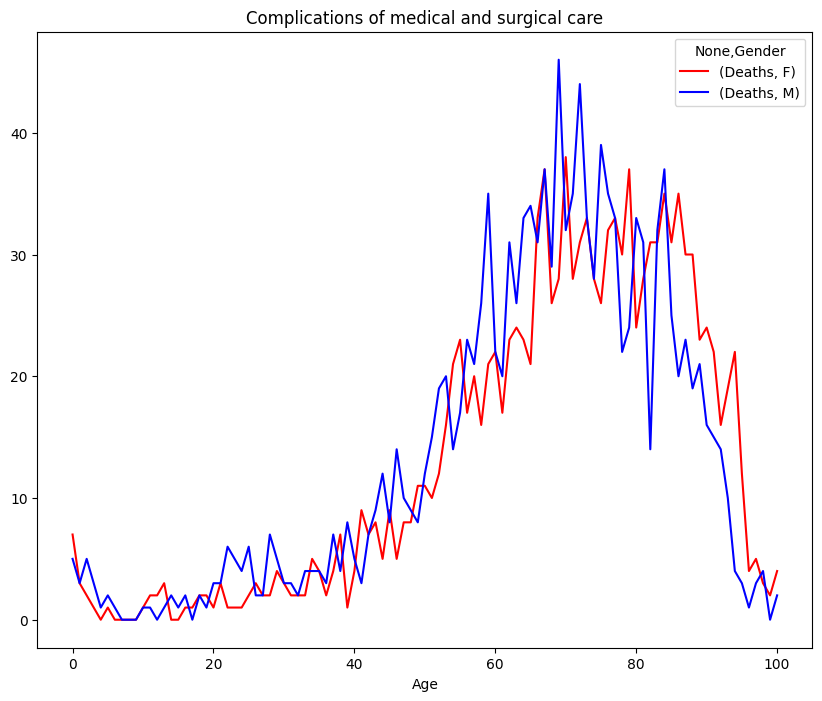

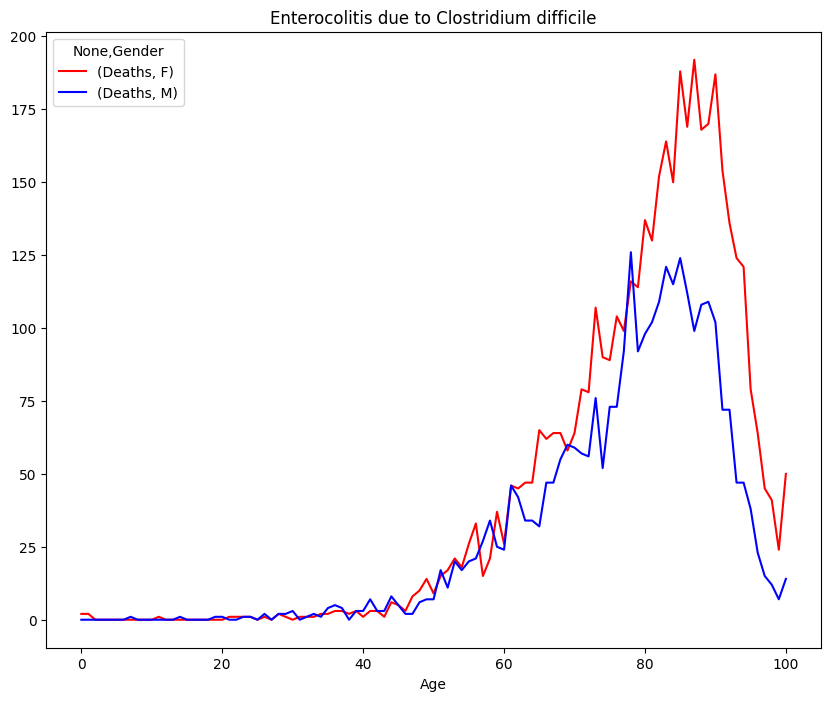

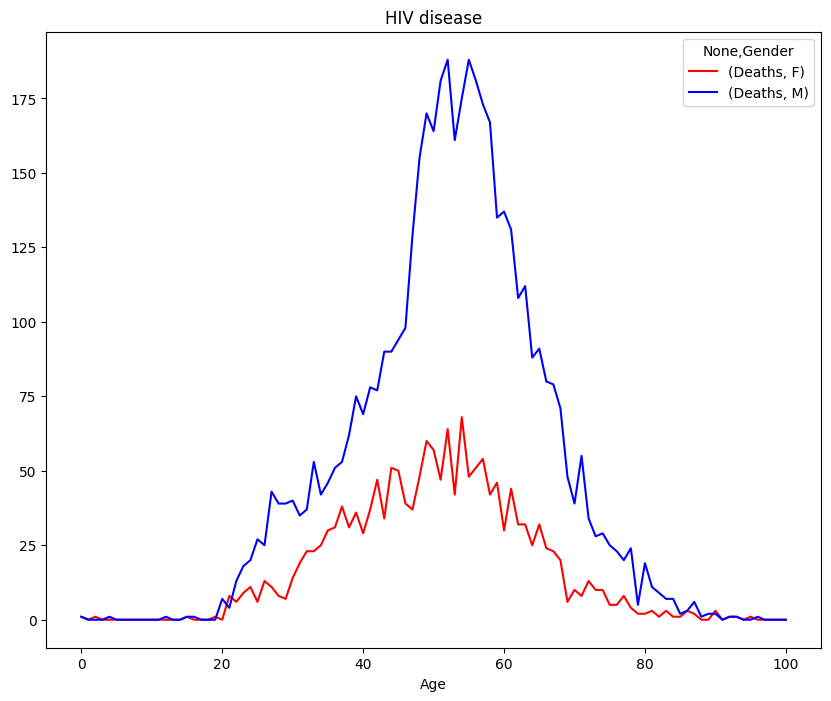

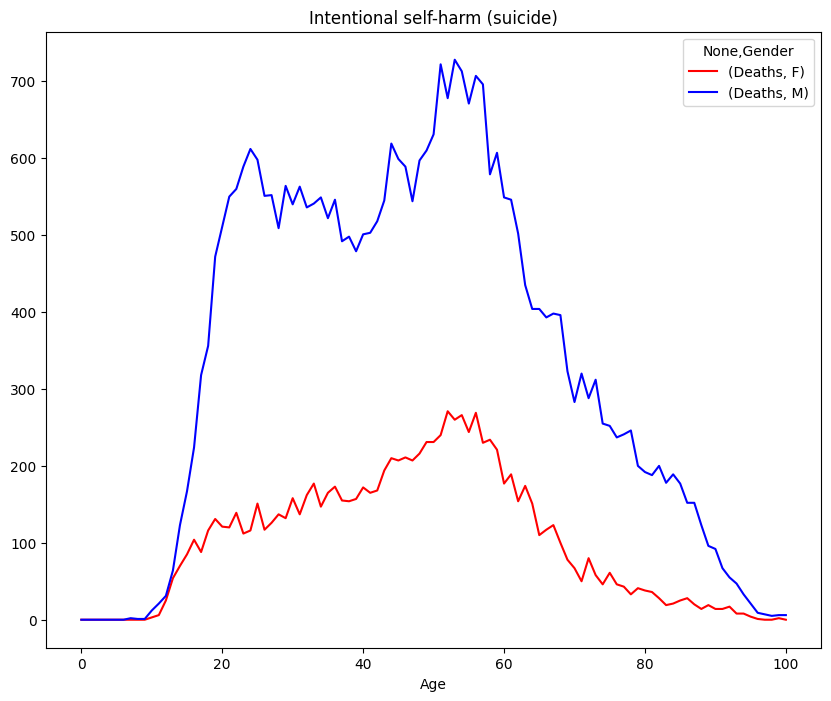

In [32]:
clist = df.Cause.unique()

for cause in clist:
    df2015_clist = df2015[df2015["Cause"].isin([cause])]
    
    df2015_clist\
    .groupby(["Age", "Gender"])\
    .agg({'Deaths':sum})\
    .unstack([1])\
    .plot(kind="line", legend=True, color=('r', 'b'), figsize=[10, 8], title=str(cause))

<font color = "green"> Summarize all your conclusions and formulate a general conclusion based on the studied data: </font>

Dataset conclusions:

More men die than women, and most often old people die from diseases.